In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import itertools
import timeit
from copy import deepcopy

# from supervised learning 
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import make_scorer

# clusutering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as EM
from sklearn.metrics import silhouette_score as sil_score, f1_score, homogeneity_score
from collections import Counter

#dimensionality reduction
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as SRP
from collections import defaultdict
from sklearn.metrics.pairwise import pairwise_distances

%matplotlib inline

In [3]:
warnings.filterwarnings('ignore')

In [4]:
np.random.seed(1)

# PART 0: Preprocesss white wine quality and abalone datasets

# load  white wine

In [5]:
wine = pd.read_csv("winequality-white.csv", delimiter=";")

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# load abalone - the header was preppended manually in data file

In [7]:
abalone = pd.read_csv("abalone.data", delimiter=",")

In [8]:
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### abalone max-mins

In [9]:
print("min, max pairs for each column (gender is skipped)")
for i in range(1,9):
    print(str(abalone.to_numpy()[:,i].min()) + 
          ", " + str(abalone.to_numpy()[:,i].max()) +
         "\t" + abalone.columns[i])

min, max pairs for each column (gender is skipped)
0.075, 0.815	Length
0.055, 0.65	Diameter
0.0, 1.13	Height
0.002, 2.8255	Whole weight
0.001, 1.488	Shucked weight
0.0005, 0.76	Viscera weight
0.0015, 1.005	Shell weight
1, 29	Rings


#### wine max-mins

In [10]:
print("min, max pairs for each column")
for i in range(0, 12):
    print(str(wine.to_numpy()[:,i].min()) + 
          ", " + str(wine.to_numpy()[:,i].max()) +
         "\t" + wine.columns[i])

min, max pairs for each column
3.8, 14.2	fixed acidity
0.08, 1.1	volatile acidity
0.0, 1.66	citric acid
0.6, 65.8	residual sugar
0.009, 0.346	chlorides
2.0, 289.0	free sulfur dioxide
9.0, 440.0	total sulfur dioxide
0.98711, 1.03898	density
2.72, 3.82	pH
0.22, 1.08	sulphates
8.0, 14.2	alcohol
3.0, 9.0	quality


### wine class distribution

(array([  20.,  163., 1457., 2198.,  880.,  175.,    5.]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 7 artists>)

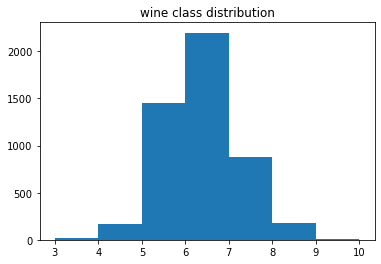

In [11]:
df_w = deepcopy(wine)
plt.title("wine class distribution")
plt.hist(df_w['quality'], bins=range(3,11))

# drop wine classes with quality 9 and 3, since they have very low sample sizes of 5 and 20, respectively

In [12]:
df_w = df_w[df_w['quality'] != 9][df_w['quality'] != 3]

# convert to one-hot sex abalone

In [13]:
df_a = deepcopy(abalone)
df_a.loc[df_a['Sex'] == 'M', 'M'] = 1
df_a.loc[df_a['Sex'] == 'M', 'F'] = 0
df_a.loc[df_a['Sex'] == 'M', 'I'] = 0

df_a.loc[df_a['Sex'] == 'F', 'F'] = 1
df_a.loc[df_a['Sex'] == 'F', 'M'] = 0
df_a.loc[df_a['Sex'] == 'F', 'I'] = 0

df_a.loc[df_a['Sex'] == 'I', 'I'] = 1
df_a.loc[df_a['Sex'] == 'I', 'M'] = 0
df_a.loc[df_a['Sex'] == 'I', 'F'] = 0
df_a=df_a.drop(['Sex'],axis=1)

#### abalone large number of classes (ring count), several outliers. Drop classes with < 14 entries

###### classes with ring count 1 and 2 only have 1 class member each. 
###### classes with ring count greater than 21 have less than 10 class member each

(array([  0.,   1.,   1.,  15.,  57., 115., 259., 391., 568., 689., 634.,
        487., 267., 203., 126., 103.,  67.,  58.,  42.,  32.,  26.,  14.,
          6.,   9.,   2.,   1.,   1.,   2.,   0.,   1.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <BarContainer object of 31 artists>)

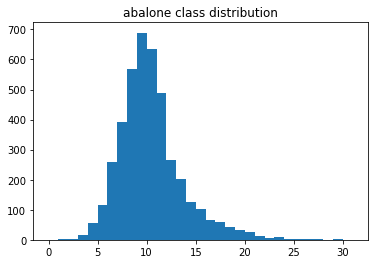

In [14]:
plt.title("abalone class distribution")
plt.hist(df_a['Rings'], bins=range(0,32))

In [15]:
df_a = df_a[df_a['Rings'] < 22][df_a['Rings'] > 2]
df_a

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1.0,0.0,0.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1.0,0.0,0.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0.0,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1.0,0.0,0.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0.0,1.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1.0,0.0,0.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1.0,0.0,0.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0.0,1.0,0.0


In [16]:
save = df_a['Rings']

In [17]:
save

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4153, dtype: int64

# standardardize

#### abalone

In [18]:
df_a = (df_a - df_a.min())/(df_a.max() - df_a.min())

In [19]:
df_a

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,0.489362,0.491071,0.084071,0.179592,0.149445,0.132324,0.146707,0.666667,1.0,0.0,0.0
1,0.340426,0.312500,0.079646,0.077196,0.065298,0.063199,0.066866,0.222222,1.0,0.0,0.0
2,0.595745,0.589286,0.119469,0.237445,0.170986,0.185648,0.206587,0.333333,0.0,1.0,0.0
3,0.468085,0.491071,0.110619,0.180302,0.143386,0.149440,0.151697,0.388889,1.0,0.0,0.0
4,0.312057,0.294643,0.070796,0.069920,0.058566,0.051350,0.051896,0.222222,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.645390,0.642857,0.146018,0.311979,0.247391,0.314022,0.245509,0.444444,0.0,1.0,0.0
4173,0.680851,0.625000,0.119469,0.340018,0.293840,0.281764,0.256986,0.388889,1.0,0.0,0.0
4174,0.695035,0.687500,0.181416,0.414552,0.352070,0.377880,0.304391,0.333333,1.0,0.0,0.0
4175,0.730496,0.705357,0.132743,0.385626,0.355772,0.342989,0.292415,0.388889,0.0,1.0,0.0


In [20]:
df_a['Rings'] = save

In [21]:
df_a

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,0.489362,0.491071,0.084071,0.179592,0.149445,0.132324,0.146707,15,1.0,0.0,0.0
1,0.340426,0.312500,0.079646,0.077196,0.065298,0.063199,0.066866,7,1.0,0.0,0.0
2,0.595745,0.589286,0.119469,0.237445,0.170986,0.185648,0.206587,9,0.0,1.0,0.0
3,0.468085,0.491071,0.110619,0.180302,0.143386,0.149440,0.151697,10,1.0,0.0,0.0
4,0.312057,0.294643,0.070796,0.069920,0.058566,0.051350,0.051896,7,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.645390,0.642857,0.146018,0.311979,0.247391,0.314022,0.245509,11,0.0,1.0,0.0
4173,0.680851,0.625000,0.119469,0.340018,0.293840,0.281764,0.256986,10,1.0,0.0,0.0
4174,0.695035,0.687500,0.181416,0.414552,0.352070,0.377880,0.304391,9,1.0,0.0,0.0
4175,0.730496,0.705357,0.132743,0.385626,0.355772,0.342989,0.292415,10,0.0,1.0,0.0


In [22]:
print("min, max pairs for each column")
for i in range(0,11):
    print(str(df_a.to_numpy()[:,i].min()) + 
          ", " + str(df_a.to_numpy()[:,i].max()) +
         "\t" + df_a.columns[i])

min, max pairs for each column
0.0, 1.0	Length
0.0, 1.0	Diameter
0.0, 1.0	Height
0.0, 1.0	Whole weight
0.0, 1.0	Shucked weight
0.0, 1.0	Viscera weight
0.0, 1.0	Shell weight
3.0, 21.0	Rings
0.0, 1.0	M
0.0, 1.0	F
0.0, 1.0	I


In [23]:
print("min, max pairs for each column")
for i in range(1,9):
    print(str(abalone.to_numpy()[:,i].min()) + 
          ", " + str(abalone.to_numpy()[:,i].max()) +
         "\t" + abalone.columns[i])

min, max pairs for each column
0.075, 0.815	Length
0.055, 0.65	Diameter
0.0, 1.13	Height
0.002, 2.8255	Whole weight
0.001, 1.488	Shucked weight
0.0005, 0.76	Viscera weight
0.0015, 1.005	Shell weight
1, 29	Rings


##### Wine

In [24]:
save = df_w['quality']

In [25]:
df_w = (df_w - df_w.min())/(df_w.max() - df_w.min())

In [26]:
df_w['quality'] = save

In [27]:
df_w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.315018,0.480597,0.267785,0.254545,0.267442,0.129032,6
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.087912,0.367164,0.132832,0.527273,0.313953,0.241935,6
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.205128,0.262687,0.154039,0.490909,0.255814,0.338710,6
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.329670,0.528358,0.163678,0.427273,0.209302,0.306452,6
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.329670,0.528358,0.163678,0.427273,0.209302,0.306452,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.161172,0.247761,0.077694,0.500000,0.325581,0.516129,6
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.402930,0.474627,0.150183,0.390909,0.279070,0.258065,5
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.205128,0.304478,0.104685,0.245455,0.279070,0.225806,6
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.131868,0.301493,0.030461,0.563636,0.186047,0.774194,7


### X_a and Y_a contain preprocessed Abalone data and labels
### X_w and Y_w contain preprocessed white wine data and labels

##### abalone

In [28]:
Y_a = deepcopy(df_a)["Rings"].to_numpy()
Y_a

array([15,  7,  9, ...,  9, 10, 12])

In [29]:
X_a = deepcopy(df_a).drop("Rings", axis=1).to_numpy()
X_a

array([[0.4893617 , 0.49107143, 0.0840708 , ..., 1.        , 0.        ,
        0.        ],
       [0.34042553, 0.3125    , 0.07964602, ..., 1.        , 0.        ,
        0.        ],
       [0.59574468, 0.58928571, 0.11946903, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.69503546, 0.6875    , 0.18141593, ..., 1.        , 0.        ,
        0.        ],
       [0.73049645, 0.70535714, 0.13274336, ..., 0.        , 1.        ,
        0.        ],
       [0.85106383, 0.83035714, 0.17256637, ..., 1.        , 0.        ,
        0.        ]])

#### wine

In [30]:
Y_w = deepcopy(df_w)["quality"].to_numpy()
Y_w

array([6, 6, 6, ..., 6, 7, 6])

In [31]:
X_w = deepcopy(df_w).drop("quality", axis=1).to_numpy()
X_w

array([[0.30769231, 0.18627451, 0.21686747, ..., 0.25454545, 0.26744186,
        0.12903226],
       [0.24038462, 0.21568627, 0.20481928, ..., 0.52727273, 0.31395349,
        0.24193548],
       [0.41346154, 0.19607843, 0.24096386, ..., 0.49090909, 0.25581395,
        0.33870968],
       ...,
       [0.25961538, 0.15686275, 0.11445783, ..., 0.24545455, 0.27906977,
        0.22580645],
       [0.16346154, 0.20588235, 0.18072289, ..., 0.56363636, 0.18604651,
        0.77419355],
       [0.21153846, 0.12745098, 0.22891566, ..., 0.49090909, 0.11627907,
        0.61290323]])

##### TESTING dict as args

In [32]:
def exfcn1(x, y, z):
    print(x)
    print(y)
    print(z)
a = { 'x':1, 'y':2, 'z':3 }
exfcn1(**a)

1
2
3


# PART 1: Clustering algorithms on datasets



In [33]:
# true labels is the array of true labels for each sample
# clusters is the array of cluster numbers for each sample
    # the two while the same size have different number assignemnts
def vote_clusterings(clusters, true_labels):
    if true_labels.shape != clusters.shape:
        print ("ERROR")
        return None
    # gets an empty array of same size as true labels
    pred = np.zeros(true_labels.shape)
    # goes thru each UNIQUE cluster number
    for cluster in set(clusters):
        # create a boolean array for this unique cluster num in the predicted numbers
        # ie, 1 == [ 1, 2, 3, 1] ==> [true, false, false, true]
        idx = np.array([ cluster == x for x in clusters])
        # get the true labels for the samples in this cluster assignment
        true_labels_for_this_cluster = true_labels[idx]
        # get most common true label for this cluster assignment
        target = Counter(true_labels_for_this_cluster).most_common(1)[0][0]
        # so, all samples with thus cluster assignment get the same predicted label
        pred[idx] = target
        
    return pred

def clustering_routine(X, Y, algorithm, parameters, hyperRange, hyperName):
    scores = {
        'hyper': [],
        'Silhouette Score': [],
        'Homogeneity Score': [],
        'trainTime': [],
        'F1 Score': [],
    }
    
    for hyper in hyperRange:
        parameters[hyperName] = hyper
        scores['hyper'].append(hyper)
        
        start = timeit.default_timer()
        evaluator = algorithm(**parameters).fit(X)
        end = timeit.default_timer()
        scores['trainTime'].append(end - start)

        clusters = evaluator.predict(X)
        scores['Silhouette Score'].append(sil_score(X, clusters))
        scores['Homogeneity Score'].append(homogeneity_score(Y, clusters))
        
        y_vote = vote_clusterings(clusters, Y)
        scores['F1 Score'].append(f1_score(Y, y_vote, average='macro'))
        
    return scores, evaluator


## Kmeans

In [34]:
%%time
params_kmeans = {
    'n_init': 10,
    'random_state': 100,
}
k_range = list(np.arange(2,50,2))

kmeans_results_w = clustering_routine(X_w, Y_w, KMeans, params_kmeans, k_range, "n_clusters")
kmeans_results_a = clustering_routine(X_a, Y_a, KMeans, params_kmeans, k_range, "n_clusters")

CPU times: user 2min 9s, sys: 8.44 s, total: 2min 18s
Wall time: 38.2 s


## EM


In [35]:
%%time
params_em = {
    'covariance_type': 'diag',
    'n_init': 1,
    'warm_start': True,
    'random_state': 100
}
kdist_range = list(np.arange(2,100,5))

em_results_w = clustering_routine(X_w, Y_w, EM, params_em, kdist_range, "n_components")
em_results_a = clustering_routine(X_a, Y_a, EM, params_em, kdist_range, "n_components")

CPU times: user 2min 18s, sys: 8.6 s, total: 2min 27s
Wall time: 40.4 s


In [36]:
def plot_iterator(results, xLab, algoName, dataName, xStr='hyper'):
    
    if xStr not in results:
        print("ERROR")
        return
    
    for key in results.keys():
        if key == xStr:
            continue
        helperPlot2(results[xStr], results[key], key, xLab, key, algoName+' '+key+' - '+dataName) 

In [37]:
def helperPlot2(xData, yData, curveLabel, xlabel, ylabel, title): 
    fig = plt.figure()
    ax = plt.axes()
    plt.title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if curveLabel == None:
        plt.plot(xData, yData, 'o-')
    else:
        plt.plot(xData, yData, 'o-', label = curveLabel)
        plt.legend(loc='best')

    
    plt.tight_layout()
    plt.show()

### Plot both clustering


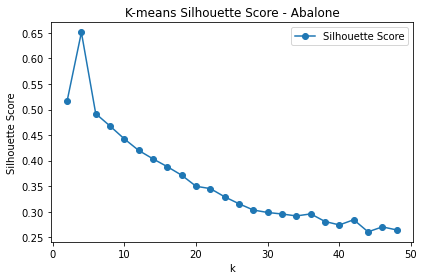

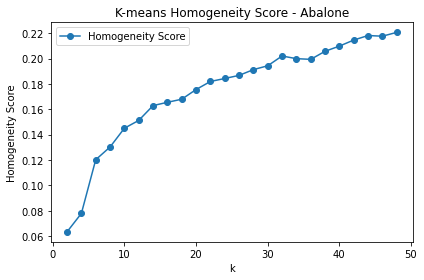

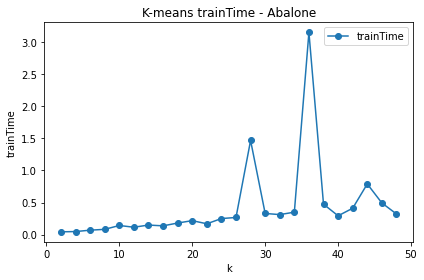

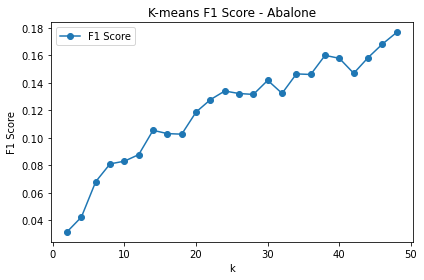

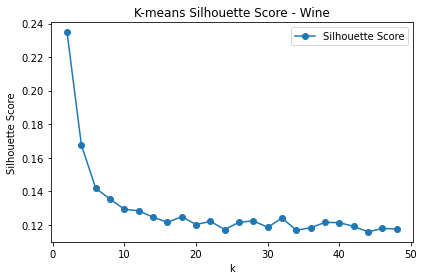

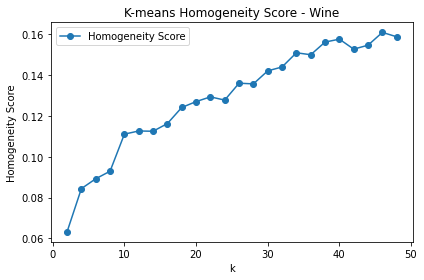

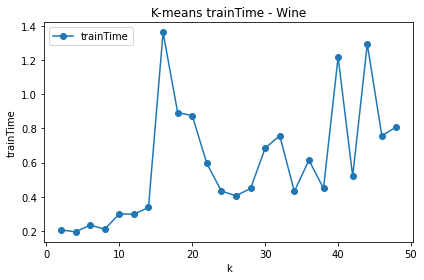

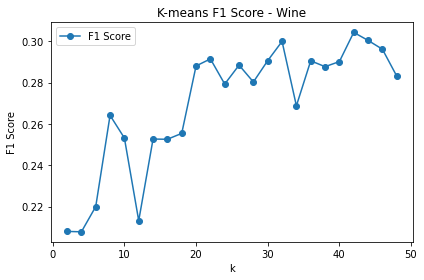

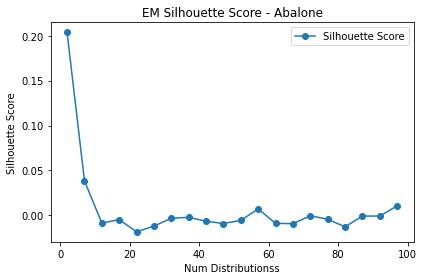

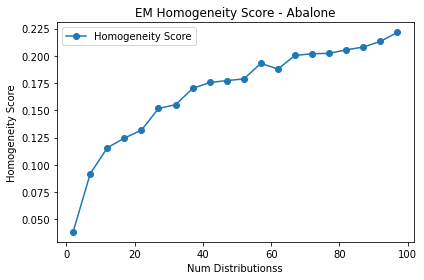

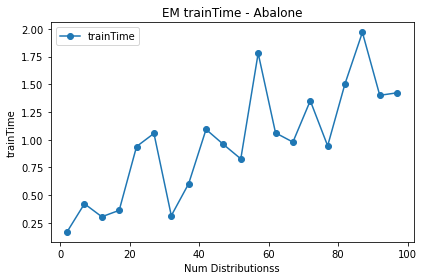

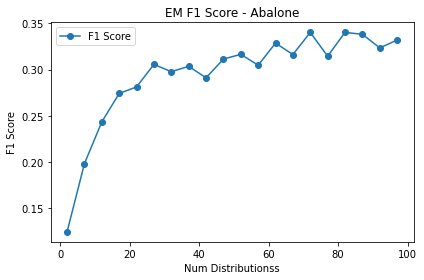

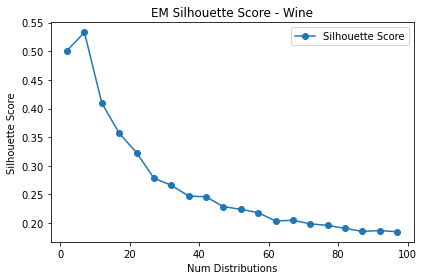

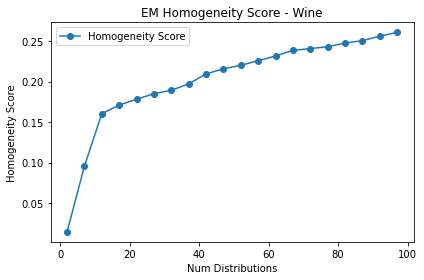

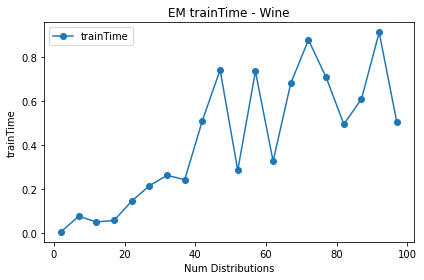

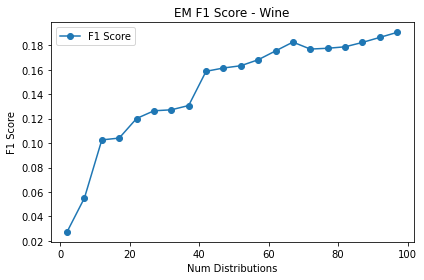

In [38]:
plot_iterator(kmeans_results_a[0], 'k', 'K-means', 'Abalone') # use k = 29
plot_iterator(kmeans_results_w[0], 'k', 'K-means', 'Wine') # use k = 10
plot_iterator(em_results_w[0], 'Num Distributionss', 'EM', 'Abalone') # use num = 7
plot_iterator(em_results_a[0], 'Num Distributions', 'EM', 'Wine') # use num = 40

From Using Elbow method on Silhouette score, 

    Using k = 29 and k = 10 for K-Means on the Abalone and Wine datasets, respectively.
    
    Using Num dist = 7 and 40 for EM on the Abalone and Wine datasets, respectively.
    

In [39]:
def show_CM(conf_matrix, classes):
    
    plt.subplots(figsize=(10, 10))
    plt.imshow(conf_matrix)
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(len(classes)), range(len(classes))):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="black")
        
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

def Eval(algorithm, x, y):

    start = timeit.default_timer()
    evaluator = algorithm.fit(x)
    end = timeit.default_timer()
    trainTime = end - start

    clusters = evaluator.predict(x)
    y_vote = vote_clusterings(clusters, y)
    
    accuracy = accuracy_score(y, y_vote)
    f1 = f1_score(y, y_vote, average='macro')
    precision = precision_score(y, y_vote, average='macro')
    recall = recall_score(y, y_vote, average='macro')
    
    print("Train Time (s): " + str(trainTime))
    print("Converge Iter " + str(algorithm.n_iter_))
    print("Accuracy: " +  str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 score: " + str(f1))

    cm = confusion_matrix(y, y_vote)
    classes = set(list(set(y_vote)) + list(set(y)))
    show_CM(cm, classes)


## Eval on best param

In [40]:
params_kmeans = {
    'n_init': 10,
    'random_state': 100,
}

Train Time (s): 0.25535410000156844
Converge Iter 30
Accuracy: 0.2745003611846858
Precision: 0.14593764580884433
Recall: 0.14754870732336842
F1 score: 0.13403178791119955
CPU times: user 1.58 s, sys: 163 ms, total: 1.74 s
Wall time: 448 ms


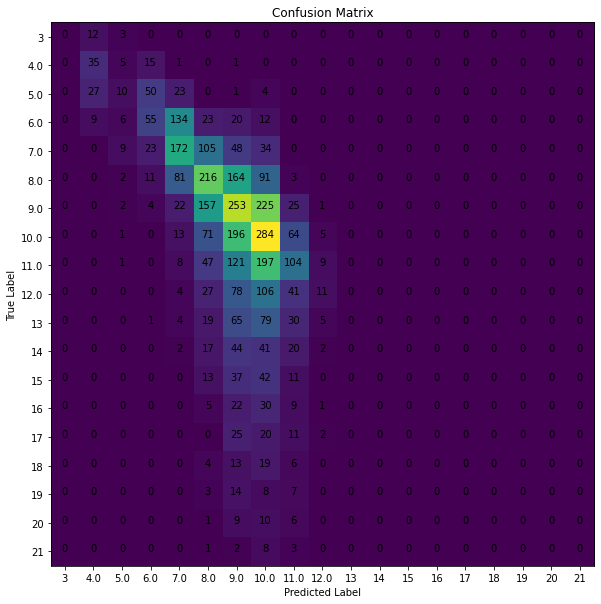

In [41]:
%%time
params_kmeans['n_clusters'] = 29 #abalone
Eval(KMeans(**params_kmeans), X_a, Y_a)

Train Time (s): 0.2844236000019009
Converge Iter 39
Accuracy: 0.496819207880156
Precision: 0.29119542879103166
Recall: 0.26292486609692367
F1 score: 0.2531898479958606
CPU times: user 1.17 s, sys: 99.9 ms, total: 1.27 s
Wall time: 333 ms


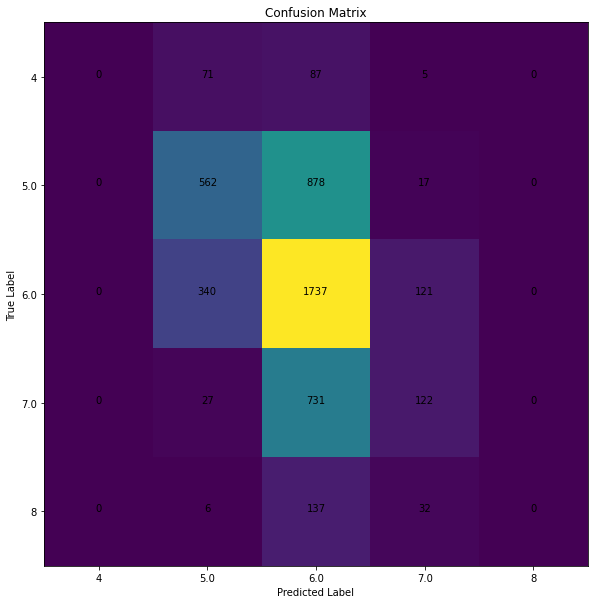

In [42]:
%%time
params_kmeans['n_clusters'] = 10 #wine
Eval(KMeans(**params_kmeans), X_w, Y_w)

In [43]:
params_em = {
    'covariance_type': 'diag',
    'n_init': 1,
    'warm_start': True,
    'random_state': 100
}

Train Time (s): 0.09510930000396911
Converge Iter 11
Accuracy: 0.21935949915723574
Precision: 0.04533883425903394
Recall: 0.08163859316502466
F1 score: 0.055131884194979545
CPU times: user 860 ms, sys: 8.17 ms, total: 868 ms
Wall time: 223 ms


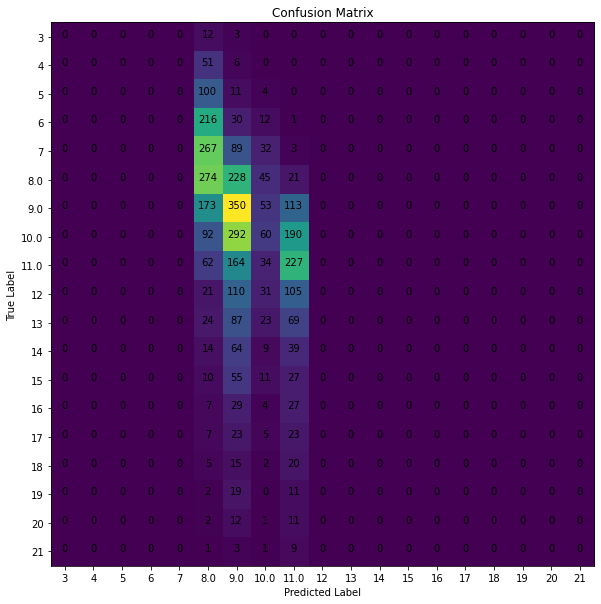

In [44]:
%%time
params_em['n_components'] = 7 #abalone
Eval(EM(**params_em), X_a, Y_a)

Train Time (s): 0.8202030999964336
Converge Iter 57
Accuracy: 0.5193925713113072
Precision: 0.3034572589005341
Recall: 0.3006458195857275
F1 score: 0.29516572406553665
CPU times: user 3.44 s, sys: 180 ms, total: 3.62 s
Wall time: 918 ms


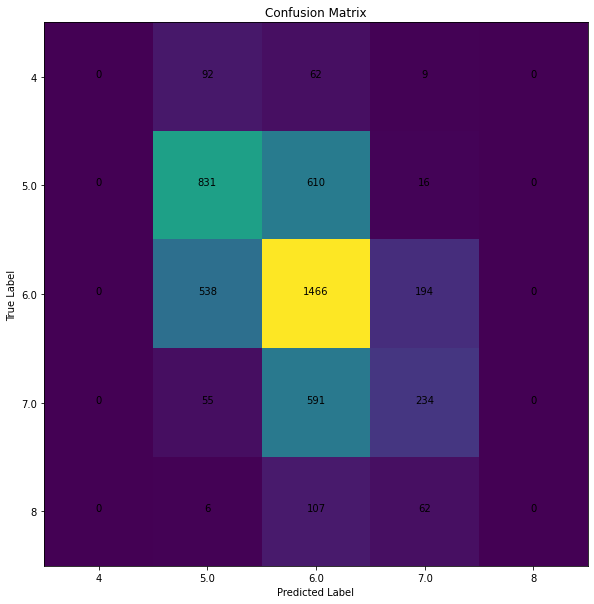

In [45]:
%%time
params_em['n_components'] = 40 #wine
Eval(EM(**params_em), X_w, Y_w)

# PART 2: Dimensionality reduction algorithms on dataset analysis


In [46]:
def PCA_analysis(X, dataName):
    pca = PCA(random_state=10).fit(X) #for all components
    
    cumVarRatio = np.cumsum(pca.explained_variance_ratio_)
    
    helperPlot2(list(range(len(pca.explained_variance_ratio_))), cumVarRatio, None,
                "Principal Components", "Cummulative Variance Explained Ratio",
                "PCA Variance Explained - " + dataName)
    
    helperPlot2(list(range(len(pca.singular_values_))), pca.singular_values_, None,
                "Principal Components", "Eigenvalues",
                "PCA Eigenvalues - " + dataName)
    
def ICA_analysis(X, dataName):
    
    dims = list(np.arange(1,(X.shape[1]+1),1))
    ica = ICA(random_state=10)
    kurtosis= []

    for dim in dims:
        ica.set_params(n_components=dim)
        kurtosis.append(pd.DataFrame(ica.fit_transform(X)).kurt(axis=0).abs().mean())

    helperPlot2(dims, kurtosis, None, "Independent Components (IC)", "Mean Kurtosis over IC",
                "Kurtosis of IC - " + dataName)

def pairwise_distance_correlation_coefficient(x1, x2):    
    dist1 = pairwise_distances(x1)
    dist2 = pairwise_distances(x2)
    return np.corrcoef(dist1.ravel(),dist2.ravel())[0,1]
    
def SRP_analysis(X, dataName, num_restarts=7):
    
    dims = list(np.arange(1,(X.shape[1]+1),1))
    d = defaultdict(dict)
    
    for dim in dims:
        for iteration in range(num_restarts):
            srp = SRP(random_state=iteration, n_components=dim)
            d[dim][iteration] = pairwise_distance_correlation_coefficient(srp.fit_transform(X), X)
    d = pd.DataFrame(d).T
    avg = d.mean(axis=1).tolist()
    std = d.std(axis=1).tolist()
    
    helperPlot2(dims, avg, None, 'Random Components', 'Avg Reconstruction Correlation', 
                'Sparse Random Projection Components avg, restarts: ' + str(num_restarts) + ', ' + str(dataName))
    helperPlot2(dims, std, None, 'Random Components', 'std Reconstruction Correlation', 
                'Sparse Random Projection Components std, restarts: ' + str(num_restarts) + ', ' + str(dataName))

def GRP_analysis(X, dataName, num_restarts=7):
    
    dims = list(np.arange(1,(X.shape[1]+1),1))
    d = defaultdict(dict)
    
    for dim in dims:
        for iteration in range(num_restarts):
            grp = GRP(random_state=iteration, n_components=dim)
            d[dim][iteration] = pairwise_distance_correlation_coefficient(grp.fit_transform(X), X)
    d = pd.DataFrame(d).T
    avg = d.mean(axis=1).tolist()
    std = d.std(axis=1).tolist()
    
    helperPlot2(dims, avg, None, 'Random Components', 'Avg Reconstruction Correlation', 
                'Gaussian Random Projection Components avg, restarts: ' + str(num_restarts) + ', ' + str(dataName))
    helperPlot2(dims, std, None, 'Random Components', 'std Reconstruction Correlation', 
                'Gaussian Random Projection Components std, restarts: ' + str(num_restarts) + ', ' + str(dataName))


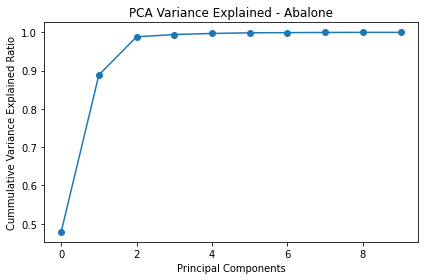

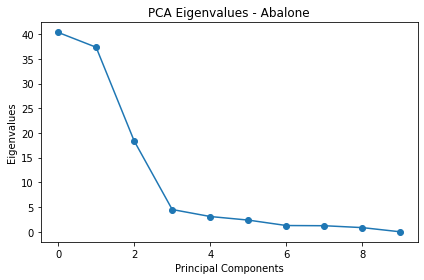

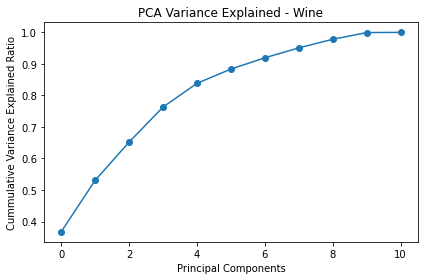

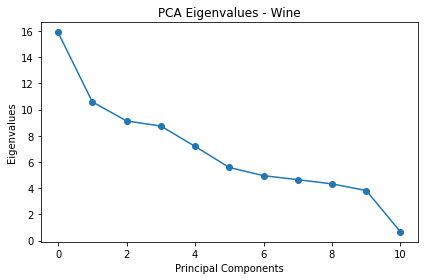

CPU times: user 1.59 s, sys: 72.1 ms, total: 1.66 s
Wall time: 581 ms


In [47]:
%%time
PCA_analysis(X_a, "Abalone") # two components explain most of variance
PCA_analysis(X_w, "Wine") # seven components explain most of variance

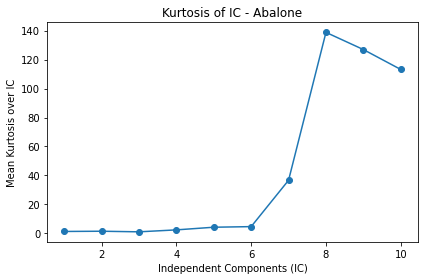

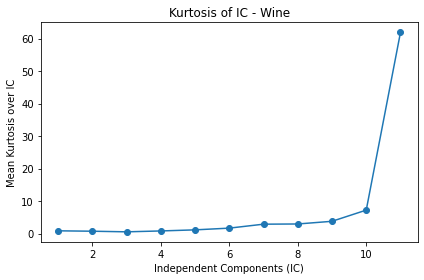

CPU times: user 3.35 s, sys: 170 ms, total: 3.52 s
Wall time: 890 ms


In [48]:
%%time
ICA_analysis(X_a, "Abalone") # 8 components give the highest kurtosis
ICA_analysis(X_w, "Wine") # 11 components give the highest kurtosis

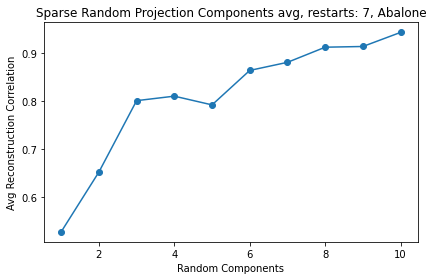

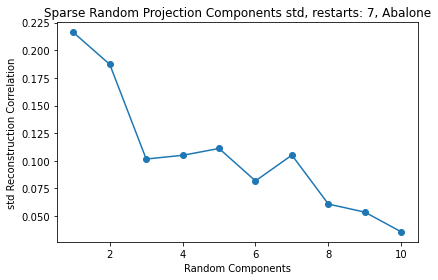

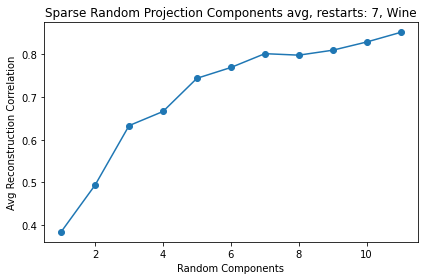

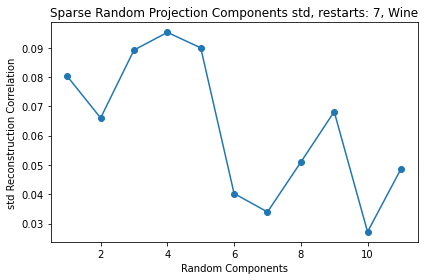

CPU times: user 4min 50s, sys: 32.6 s, total: 5min 23s
Wall time: 1min 59s


In [49]:
%%time
SRP_analysis(X_a, "Abalone")
# 6 components have close to 90% avg reconstruction correlation with low deviation
# begins to drop to 80% at 5 compoonents 
SRP_analysis(X_w, "Wine")
# similarly, 6 components have close to 80% avg reoncstrucion correlation at 4% devation
# going down to 5 components increase deviation to 9%; most components from 6-9 are 
# close to 80% deviation anyway

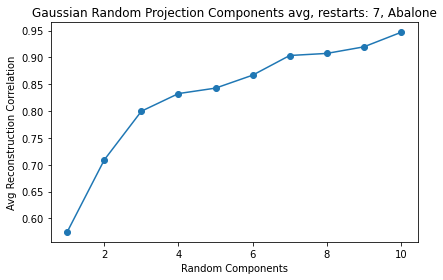

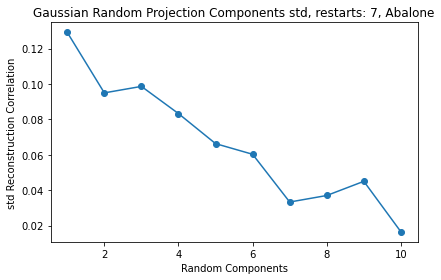

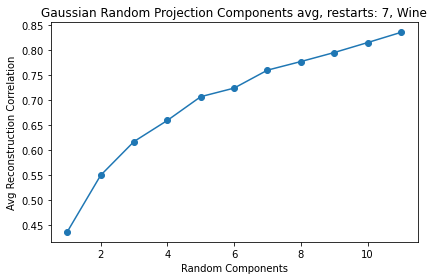

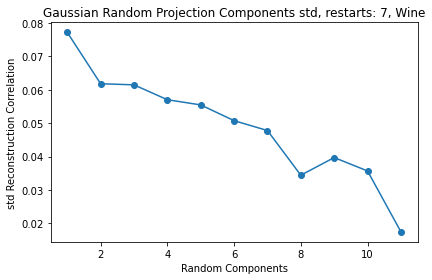

CPU times: user 5min 1s, sys: 33.9 s, total: 5min 35s
Wall time: 2min 2s


In [50]:
%%time
GRP_analysis(X_a, "Abalone") 
# 7 components have over 90% reconsturcitons with very low deviation
# moving down to 6 will decrease it by 5% and have a sharp increase in deviation
GRP_analysis(X_w, "Wine")
# mostly a linear decrease for less components. stick to 10.

#### dimensionality reduce data with experiementally determined ideal component count above

In [51]:
%%time
X_a_pca = PCA(n_components=2,random_state=10).fit_transform(X_a)
X_a_ica = ICA(n_components=8,random_state=10).fit_transform(X_a)
X_a_srp = SRP(n_components=6,random_state=7).fit_transform(X_a)
X_a_grp = GRP(n_components=7,random_state=7).fit_transform(X_a)

CPU times: user 1.09 s, sys: 79.8 ms, total: 1.17 s
Wall time: 295 ms


In [52]:
%%time
X_w_pca = PCA(n_components=7,random_state=10).fit_transform(X_w)
X_w_ica = ICA(n_components=11,random_state=10).fit_transform(X_w)
X_w_srp = SRP(n_components=6,random_state=7).fit_transform(X_w)
X_w_grp = GRP(n_components=10,random_state=7).fit_transform(X_w)

CPU times: user 1.37 s, sys: 98.8 ms, total: 1.47 s
Wall time: 371 ms


# PART 3: Run clustering algorithms on dimensionality reduced data

In [53]:
params_kmeans = {
    'n_init': 10,
    'random_state': 100,
}
k_range = list(np.arange(2,50,4))

params_em = {
    'covariance_type': 'diag',
    'n_init': 1,
    'warm_start': True,
    'random_state': 100
}
kdist_range = list(np.arange(2,100,10))

## ABALONE

##### kmeans

In [54]:
%%time
kmeans_a_pca = clustering_routine(X_a_pca, Y_a, KMeans, params_kmeans, k_range, "n_clusters")
kmeans_a_ica = clustering_routine(X_a_ica, Y_a, KMeans, params_kmeans, k_range, "n_clusters")
kmeans_a_srp = clustering_routine(X_a_srp, Y_a, KMeans, params_kmeans, k_range, "n_clusters")
kmeans_a_grp = clustering_routine(X_a_grp, Y_a, KMeans, params_kmeans, k_range, "n_clusters")

CPU times: user 1min 38s, sys: 6.85 s, total: 1min 45s
Wall time: 28.1 s


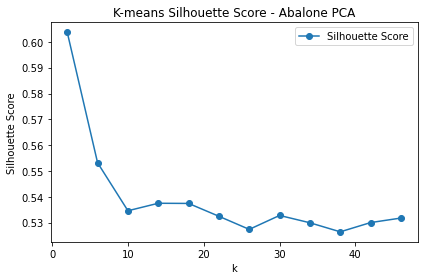

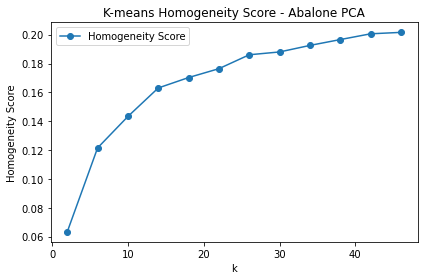

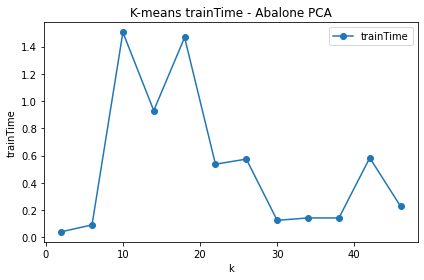

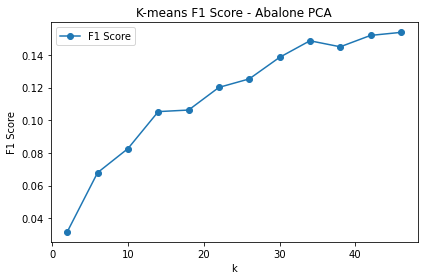

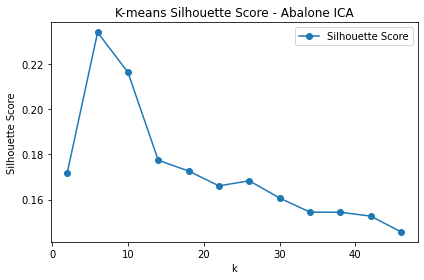

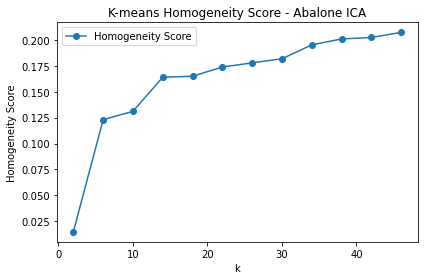

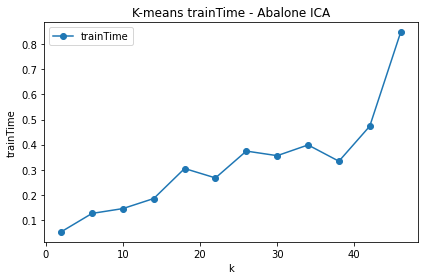

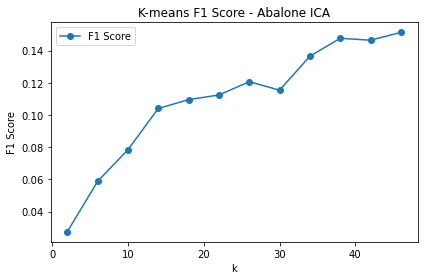

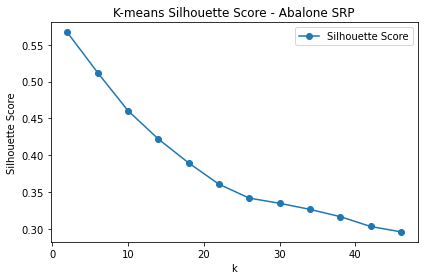

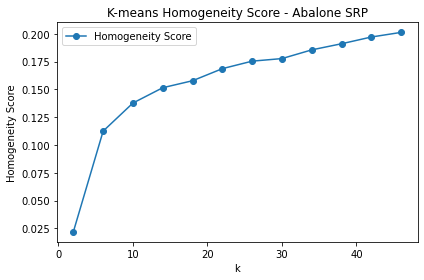

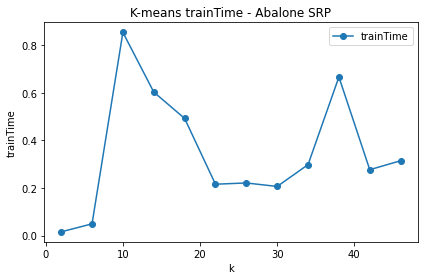

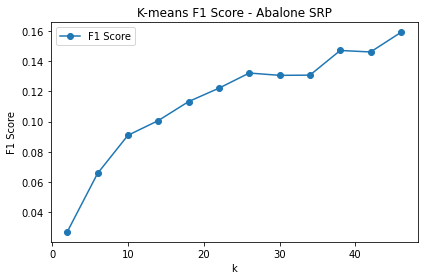

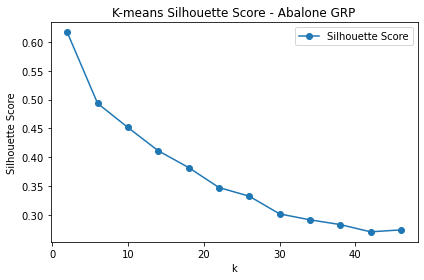

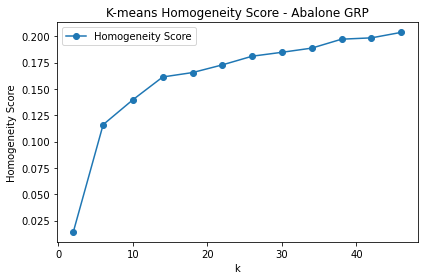

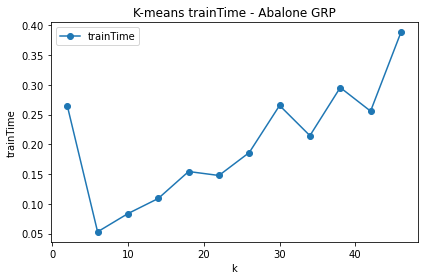

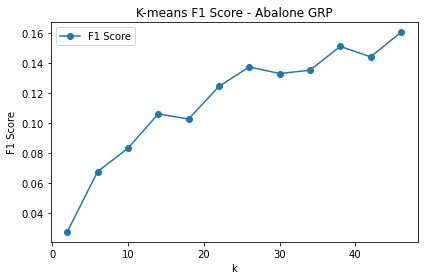

In [56]:
plot_iterator(kmeans_a_pca[0], 'k', 'K-means', 'Abalone PCA') # 10
plot_iterator(kmeans_a_ica[0], 'k', 'K-means', 'Abalone ICA') # 30
plot_iterator(kmeans_a_srp[0], 'k', 'K-means', 'Abalone SRP') # 30
plot_iterator(kmeans_a_grp[0], 'k', 'K-means', 'Abalone GRP') # 30

KMeans - PCA - abalone
Train Time (s): 0.10597879999841098
Converge Iter 6
Accuracy: 0.25018059234288464
Precision: 0.07044517798397316
Recall: 0.1065603535637153
F1 score: 0.08260448242468431
KMeans - ICA - abalone
Train Time (s): 0.4513647000057972
Converge Iter 36
Accuracy: 0.25403322899109076
Precision: 0.16387300587077355
Recall: 0.12923764440576646
F1 score: 0.11542611884759899
KMeans - SRP - abalone
Train Time (s): 0.22288400000252295
Converge Iter 24
Accuracy: 0.26920298579340235
Precision: 0.1456341761442164
Recall: 0.14503481861059828
F1 score: 0.13064365348317394
KMeans - GRP - wine
Train Time (s): 0.2331151000034879
Converge Iter 16
Accuracy: 0.2752227305562244
Precision: 0.14171415357875858
Recall: 0.14639740628314762
F1 score: 0.13294319074754601
CPU times: user 5.81 s, sys: 492 ms, total: 6.3 s
Wall time: 1.61 s


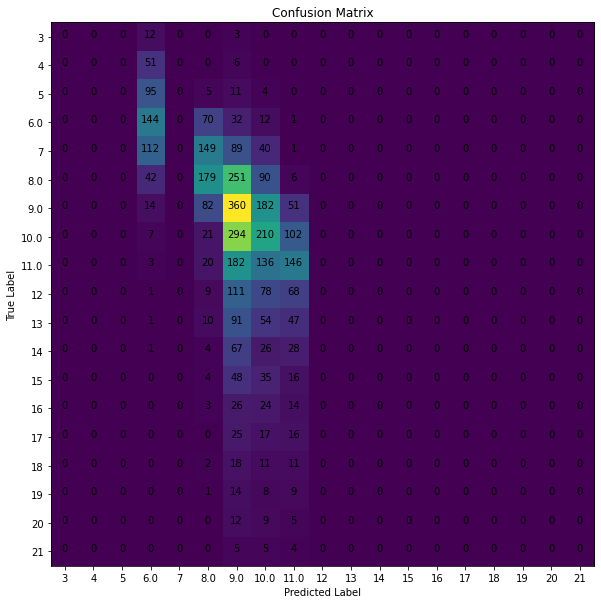

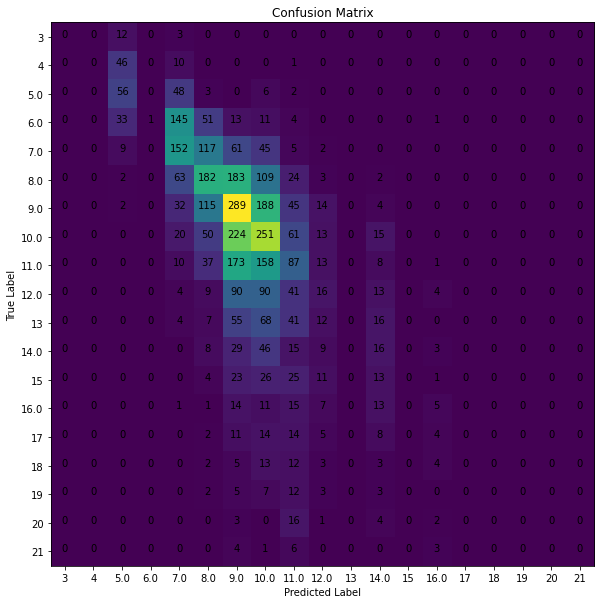

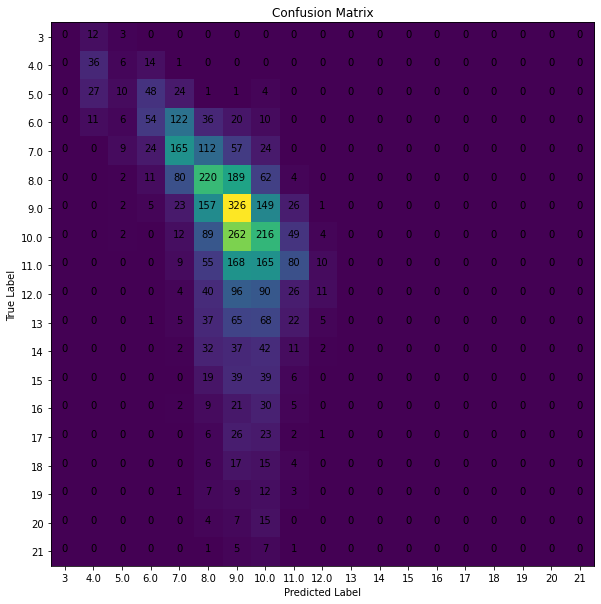

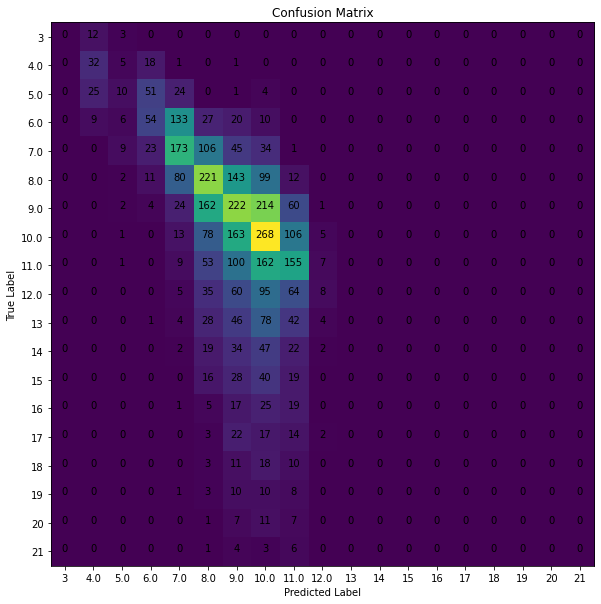

In [57]:
%%time
print("KMeans - PCA - abalone")
params_kmeans['n_clusters'] = 10
Eval(KMeans(**params_kmeans), X_a_pca, Y_a)
print("KMeans - ICA - abalone")
params_kmeans['n_clusters'] = 30
Eval(KMeans(**params_kmeans), X_a_ica, Y_a)
print("KMeans - SRP - abalone")
params_kmeans['n_clusters'] = 30
Eval(KMeans(**params_kmeans), X_a_srp, Y_a)
print("KMeans - GRP - wine")
params_kmeans['n_clusters'] = 30
Eval(KMeans(**params_kmeans), X_a_grp, Y_a)

#### EM

In [58]:
%%time
em_a_pca = clustering_routine(X_a_pca, Y_a, EM, params_em, kdist_range, "n_components")
em_a_ica = clustering_routine(X_a_ica, Y_a, EM, params_em, kdist_range, "n_components")
em_a_srp = clustering_routine(X_a_srp, Y_a, EM, params_em, kdist_range, "n_components")
em_a_grp = clustering_routine(X_a_grp, Y_a, EM, params_em, kdist_range, "n_components")

CPU times: user 1min 22s, sys: 4.28 s, total: 1min 26s
Wall time: 22.9 s


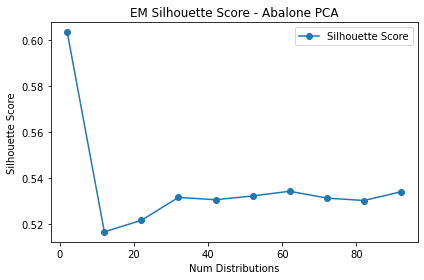

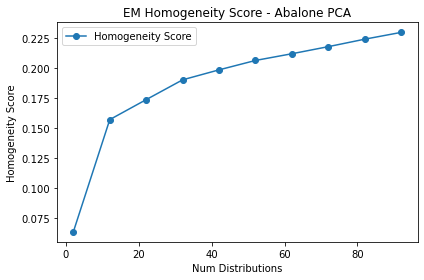

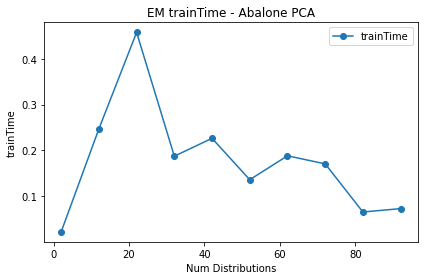

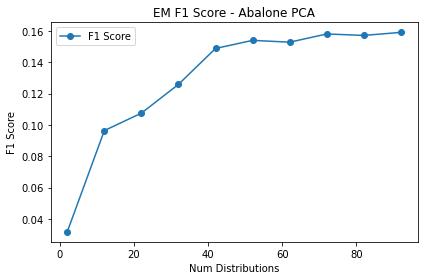

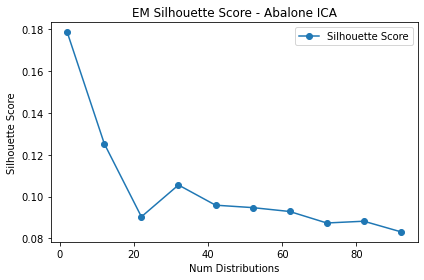

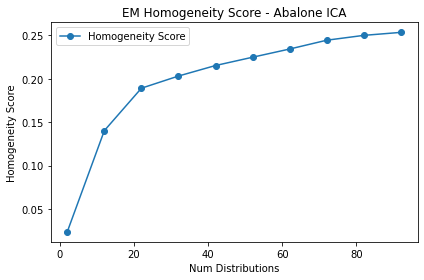

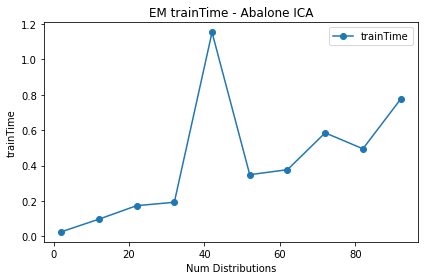

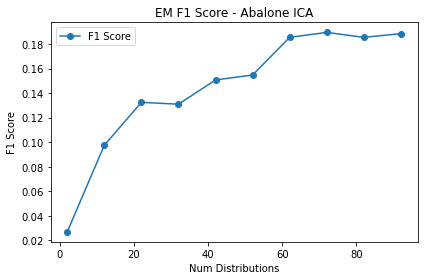

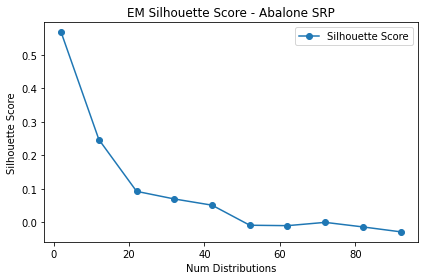

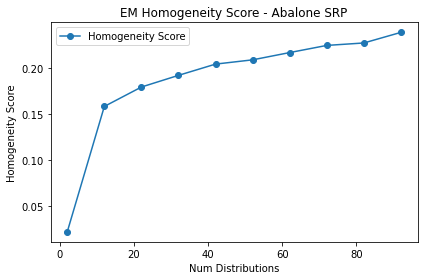

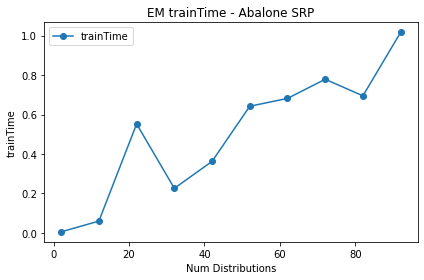

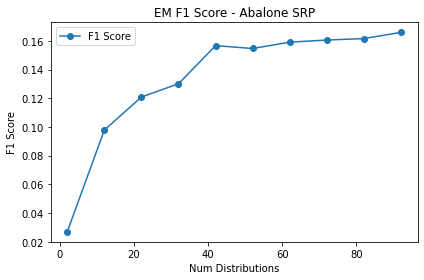

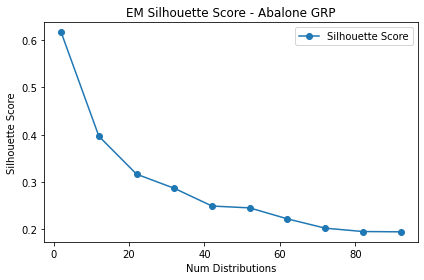

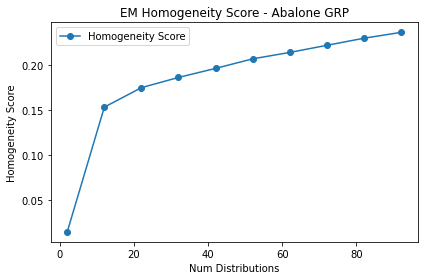

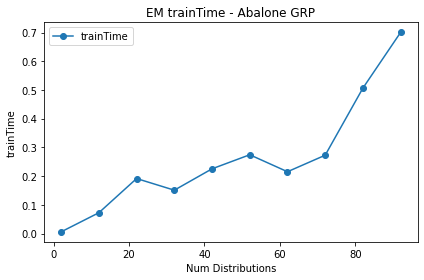

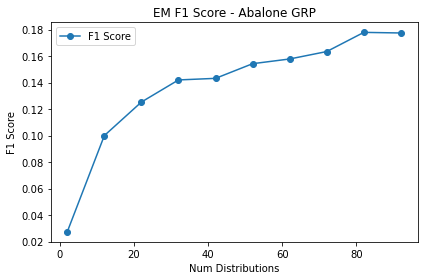

CPU times: user 1.83 s, sys: 63.1 ms, total: 1.9 s
Wall time: 1.85 s


In [59]:
%%time
plot_iterator(em_a_pca[0], 'Num Distributions', 'EM', 'Abalone PCA') #30
plot_iterator(em_a_ica[0], 'Num Distributions', 'EM', 'Abalone ICA') #30
plot_iterator(em_a_srp[0], 'Num Distributions', 'EM', 'Abalone SRP') #40
plot_iterator(em_a_grp[0], 'Num Distributions', 'EM', 'Abalone GRP') # 40

EM - PCA - abalone
Train Time (s): 0.15837309999915306
Converge Iter 17
Accuracy: 0.2752227305562244
Precision: 0.11066776669268126
Recall: 0.13600615144989017
F1 score: 0.10904311851213304
EM - ICA - abalone
Train Time (s): 0.1542845000003581
Converge Iter 22
Accuracy: 0.26414640019263186
Precision: 0.15178187155339837
Recall: 0.14709065971148974
F1 score: 0.13402404351534328
EM - SRP - abalone
Train Time (s): 0.29024719999870285
Converge Iter 34
Accuracy: 0.27859378762340475
Precision: 0.1427096069791508
Recall: 0.15725063412083276
F1 score: 0.14442184762456223
EM - GRP - abalone
Train Time (s): 0.23498880000261124
Converge Iter 21
Accuracy: 0.27570431013725016
Precision: 0.15714356156335882
Recall: 0.1591753985337173
F1 score: 0.1476994873816518
CPU times: user 5.57 s, sys: 120 ms, total: 5.69 s
Wall time: 1.45 s


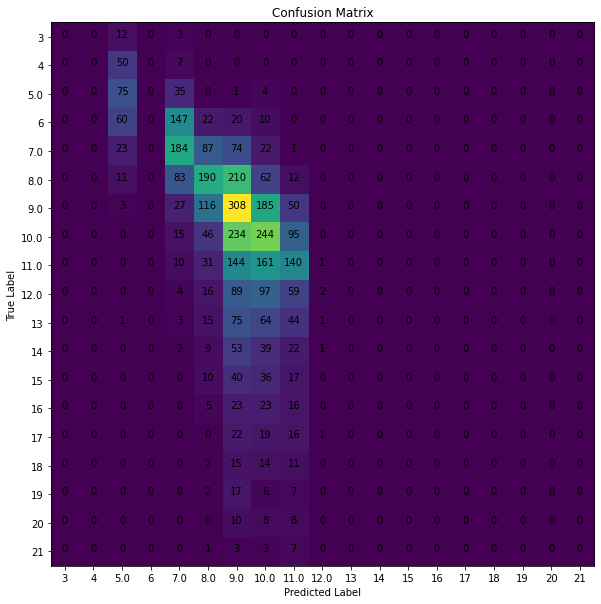

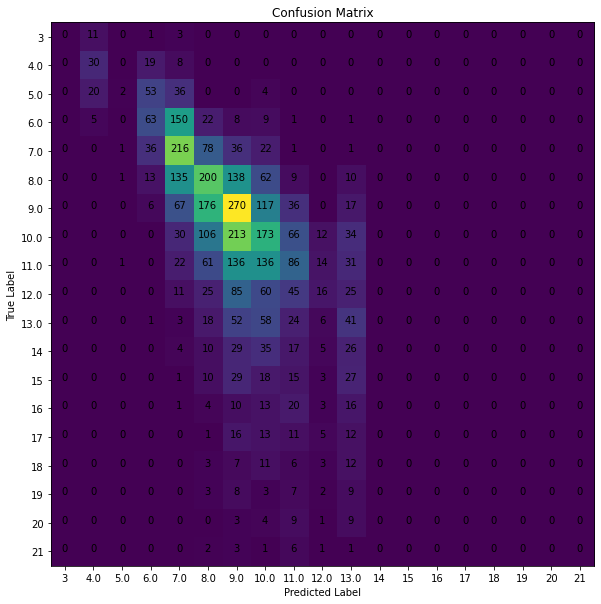

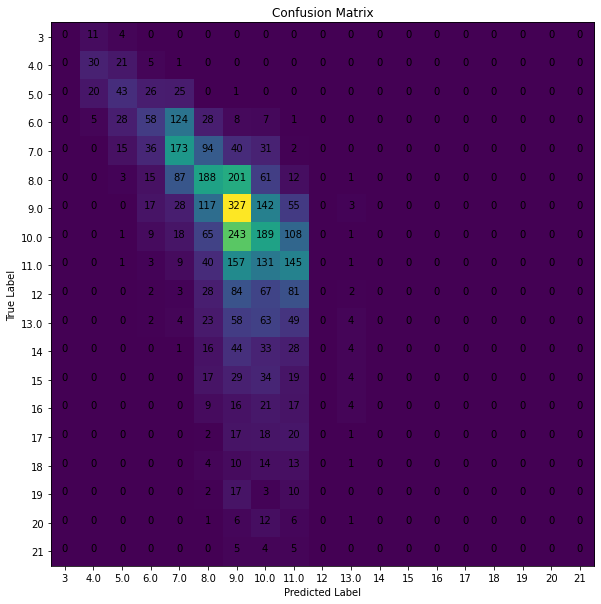

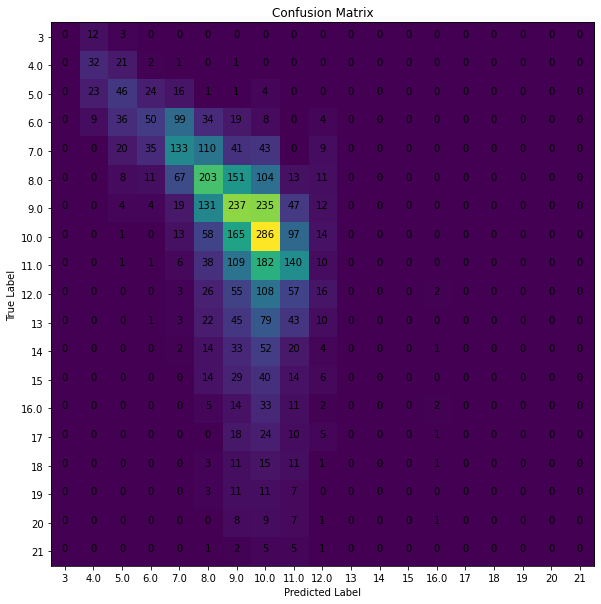

In [60]:
%%time
print("EM - PCA - abalone")
params_em['n_components'] = 30 
Eval(EM(**params_em), X_a_pca, Y_a)
print("EM - ICA - abalone")
params_em['n_components'] = 30 
Eval(EM(**params_em), X_a_ica, Y_a)
print("EM - SRP - abalone")
params_em['n_components'] = 40 
Eval(EM(**params_em), X_a_srp, Y_a)
print("EM - GRP - abalone")
params_em['n_components'] = 40 
Eval(EM(**params_em), X_a_grp, Y_a)

## WINE

##### kmeans

In [61]:
%%time
kmeans_w_pca = clustering_routine(X_w_pca, Y_w, KMeans, params_kmeans, k_range, "n_clusters")
kmeans_w_ica = clustering_routine(X_w_ica, Y_w, KMeans, params_kmeans, k_range, "n_clusters")
kmeans_w_srp = clustering_routine(X_w_srp, Y_w, KMeans, params_kmeans, k_range, "n_clusters")
kmeans_w_grp = clustering_routine(X_w_grp, Y_w, KMeans, params_kmeans, k_range, "n_clusters")

CPU times: user 1min 49s, sys: 7.42 s, total: 1min 57s
Wall time: 33.5 s


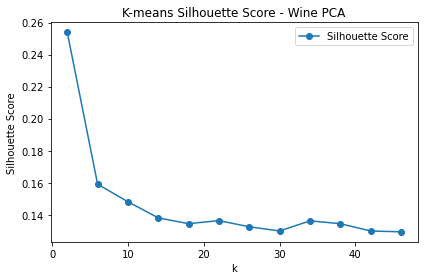

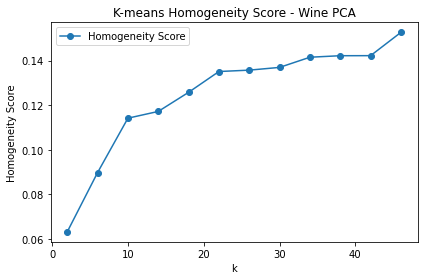

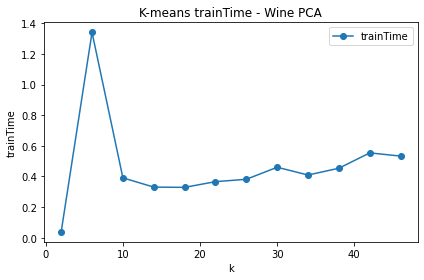

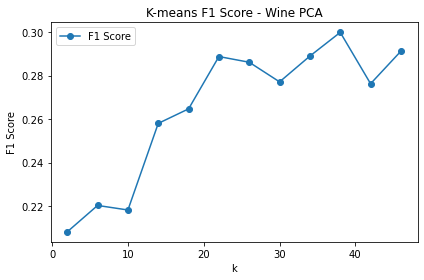

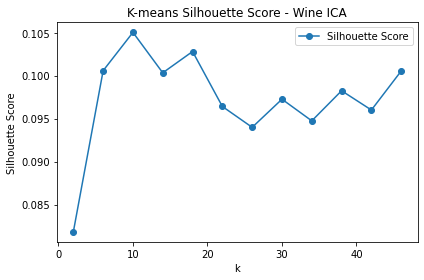

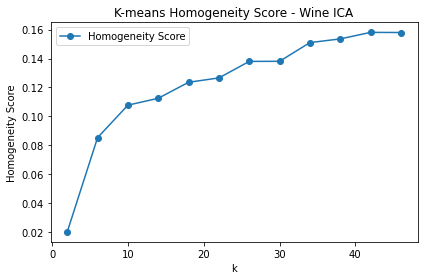

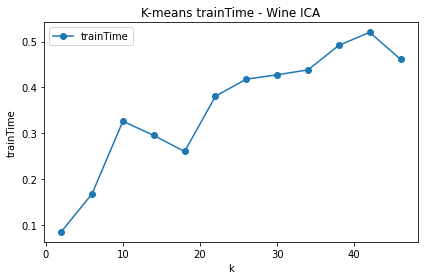

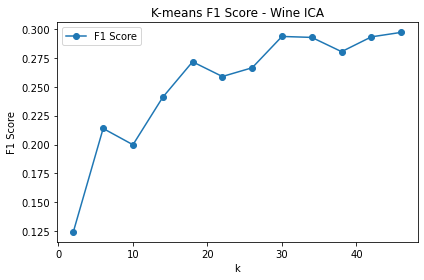

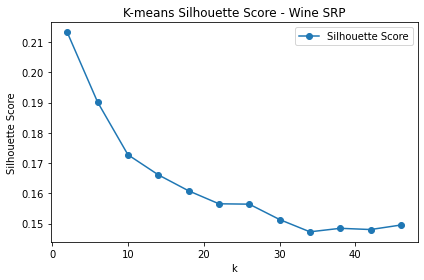

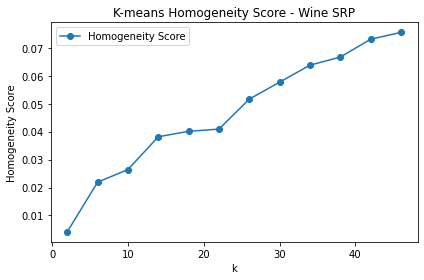

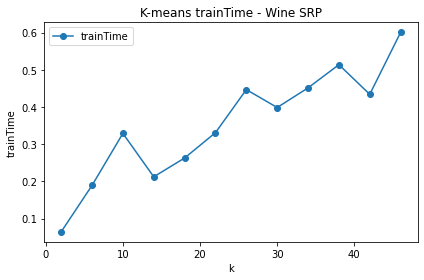

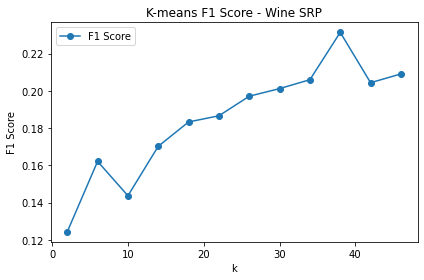

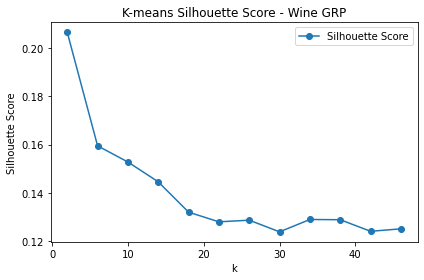

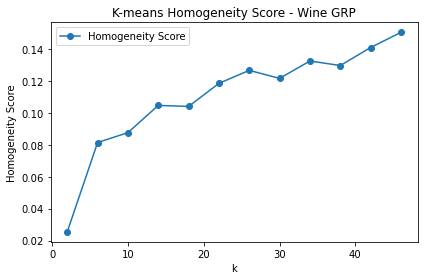

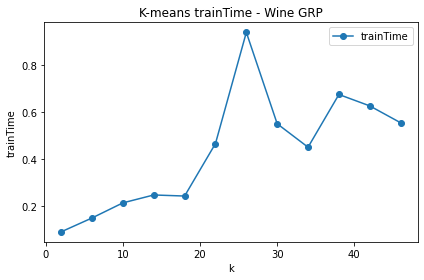

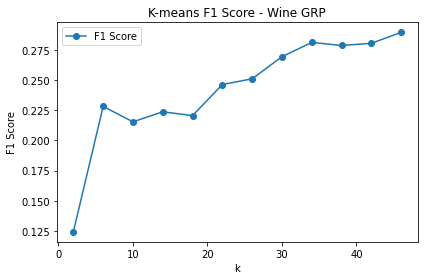

CPU times: user 1.8 s, sys: 22.1 ms, total: 1.82 s
Wall time: 1.77 s


In [62]:
%%time
plot_iterator(kmeans_w_pca[0], 'k', 'K-means', 'Wine PCA') # 10
plot_iterator(kmeans_w_ica[0], 'k', 'K-means', 'Wine ICA') # ??? 20?
plot_iterator(kmeans_w_srp[0], 'k', 'K-means', 'Wine SRP') # 17
plot_iterator(kmeans_w_grp[0], 'k', 'K-means', 'Wine GRP') # 17 

KMeans - PCA - wine
Train Time (s): 0.3315459999939776
Converge Iter 66
Accuracy: 0.5017443053560435
Precision: 0.20987409969802692
Recall: 0.2502871831445946
F1 score: 0.21816646587618624
KMeans - ICA - wine
Train Time (s): 0.385198500000115
Converge Iter 52
Accuracy: 0.49517750872152677
Precision: 0.3017072038443011
Recall: 0.26388582594328847
F1 score: 0.2537351151589141
KMeans - SRP - wine
Train Time (s): 1.8533446000001277
Converge Iter 39
Accuracy: 0.46398522470757236
Precision: 0.18451316537311643
Recall: 0.21605215448248644
F1 score: 0.16970008350459276
KMeans - GRP - wine
Train Time (s): 0.3329980999988038
Converge Iter 33
Accuracy: 0.5054381284629592
Precision: 0.20369238282596153
Recall: 0.2603936441876717
F1 score: 0.22646563496186278
CPU times: user 11.7 s, sys: 624 ms, total: 12.3 s
Wall time: 3.16 s


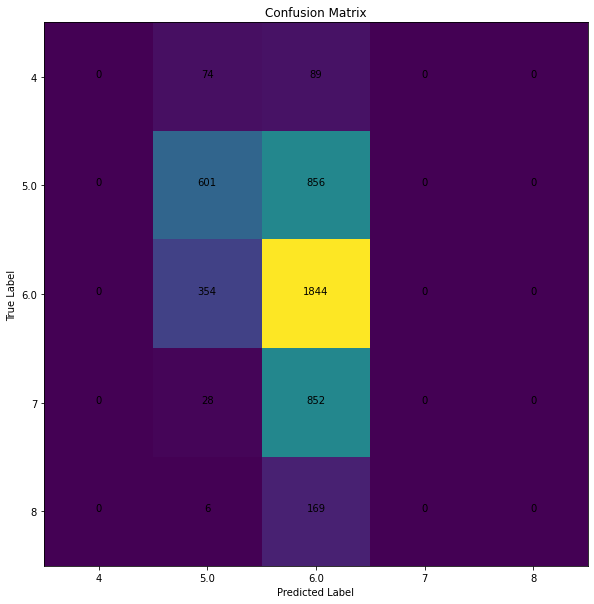

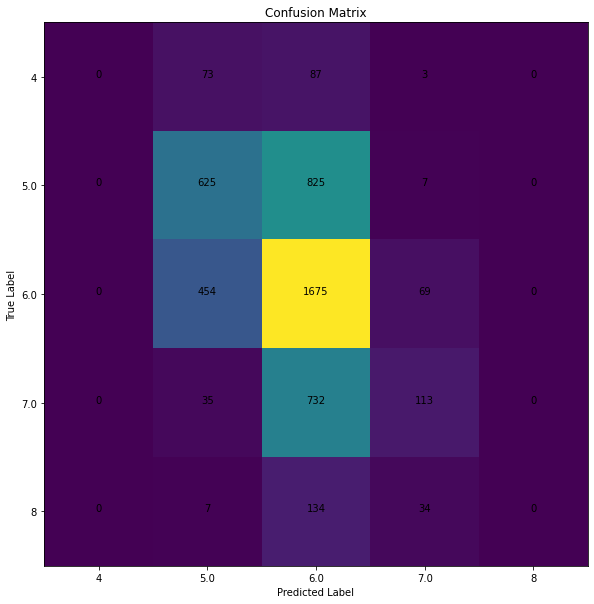

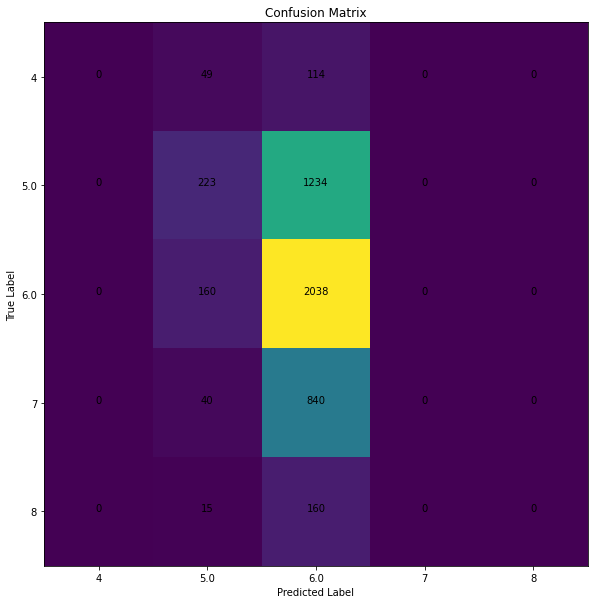

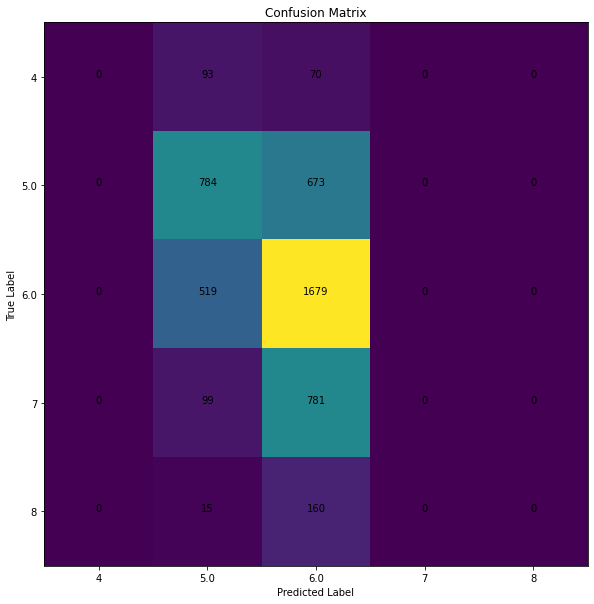

In [63]:
%%time
print("KMeans - PCA - wine")
params_kmeans['n_clusters'] = 10
Eval(KMeans(**params_kmeans), X_w_pca, Y_w)
print("KMeans - ICA - wine")
params_kmeans['n_clusters'] = 20
Eval(KMeans(**params_kmeans), X_w_ica, Y_w)
print("KMeans - SRP - wine")
params_kmeans['n_clusters'] = 17
Eval(KMeans(**params_kmeans), X_w_srp, Y_w)
print("KMeans - GRP - wine")
params_kmeans['n_clusters'] = 17
Eval(KMeans(**params_kmeans), X_w_grp, Y_w)

##### EM

In [64]:
%%time
em_w_pca = clustering_routine(X_w_pca, Y_w, EM, params_em, kdist_range, "n_components")
em_w_ica = clustering_routine(X_w_ica, Y_w, EM, params_em, kdist_range, "n_components")
em_w_srp = clustering_routine(X_w_srp, Y_w, EM, params_em, kdist_range, "n_components")
em_w_grp = clustering_routine(X_w_grp, Y_w, EM, params_em, kdist_range, "n_components")

CPU times: user 1min 53s, sys: 6.04 s, total: 1min 59s
Wall time: 33.4 s


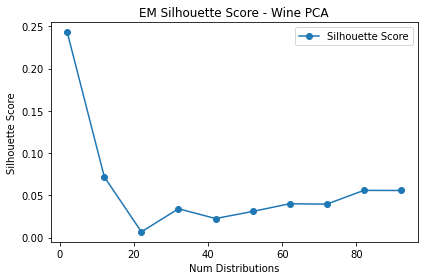

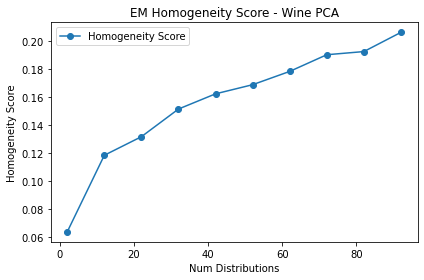

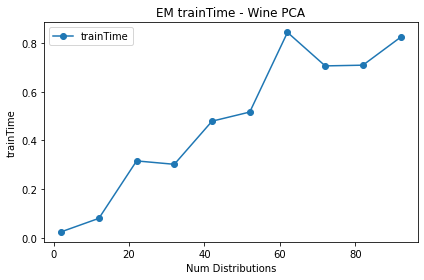

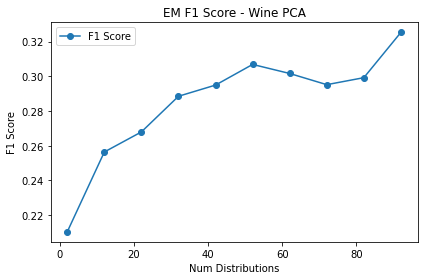

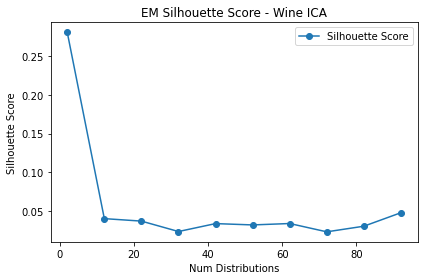

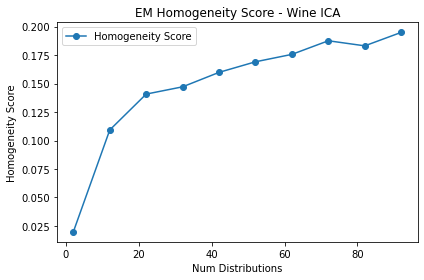

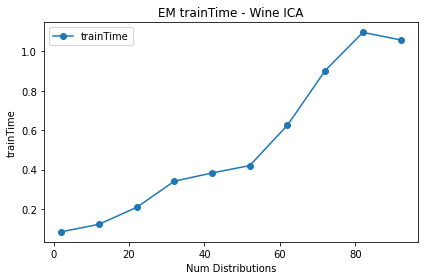

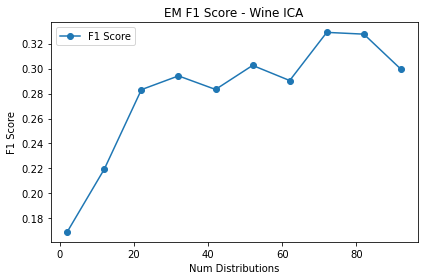

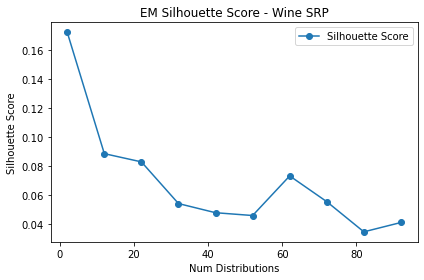

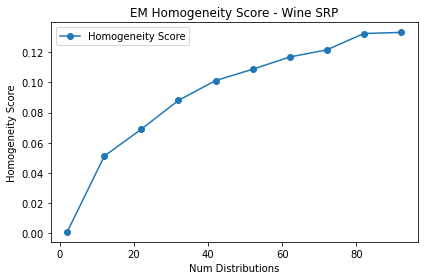

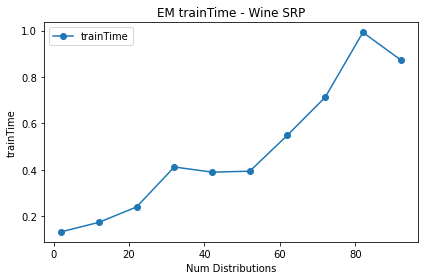

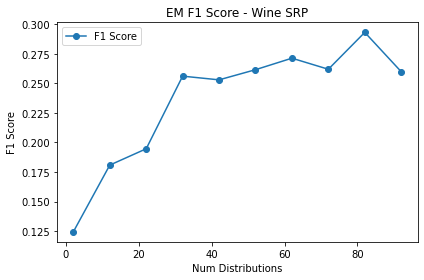

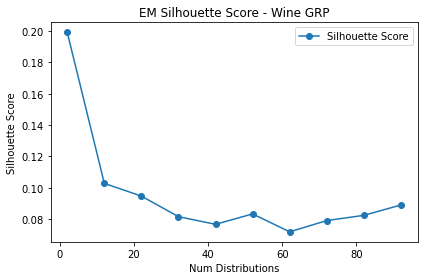

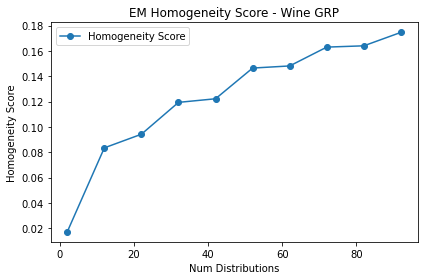

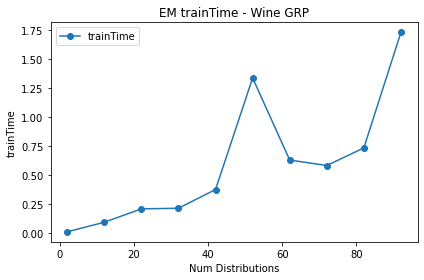

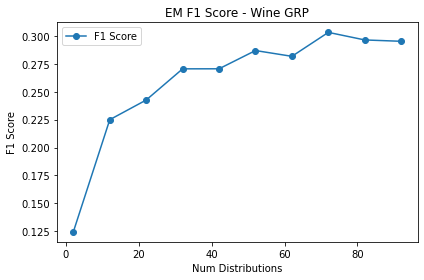

In [65]:
plot_iterator(em_w_pca[0], 'Num Distributions', 'EM', 'Wine PCA') # 10
plot_iterator(em_w_ica[0], 'Num Distributions', 'EM', 'Wine ICA') # 10
plot_iterator(em_w_srp[0], 'Num Distributions', 'EM', 'Wine SRP') # 30
plot_iterator(em_w_grp[0], 'Num Distributions', 'EM', 'Wine GRP') # 20

EM - PCA - wine
Train Time (s): 0.11352310000074795
Converge Iter 15
Accuracy: 0.49415144674738354
Precision: 0.2762916582011617
Recall: 0.26349123760274196
F1 score: 0.2423405193277625
EM - ICA - wine
Train Time (s): 0.1414539999968838
Converge Iter 26
Accuracy: 0.4955879335111841
Precision: 0.2044228353183577
Recall: 0.24950104387653843
F1 score: 0.21772282251220795
EM - SRP - wine
Train Time (s): 0.43270189999748254
Converge Iter 58
Accuracy: 0.5021547301457008
Precision: 0.2901213061035529
Recall: 0.2608723935660665
F1 score: 0.24113667340895995
EM - GRP - wine
Train Time (s): 0.2757075999979861
Converge Iter 47
Accuracy: 0.499692181407757
Precision: 0.2823589325109398
Recall: 0.266169603722063
F1 score: 0.24941603289796133
CPU times: user 4.34 s, sys: 238 ms, total: 4.57 s
Wall time: 1.16 s


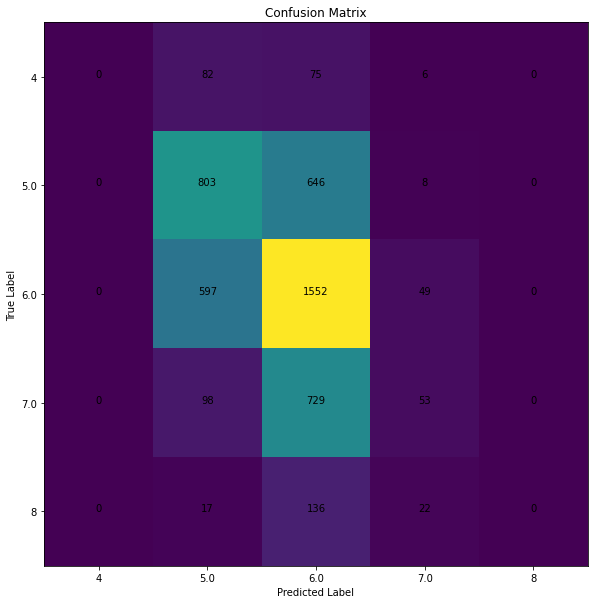

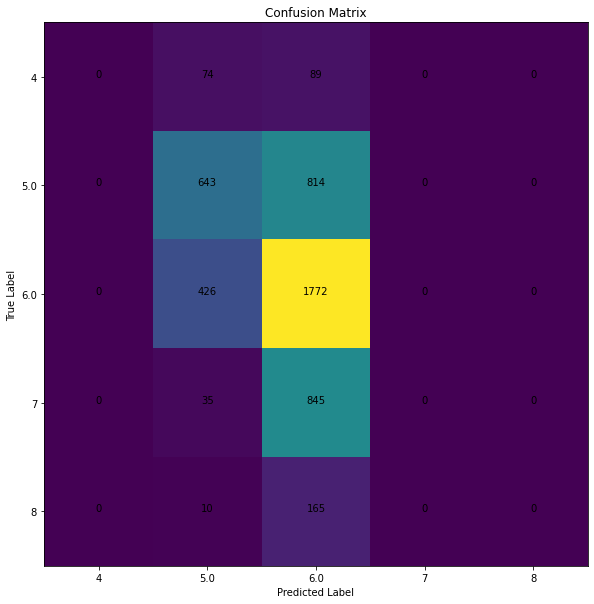

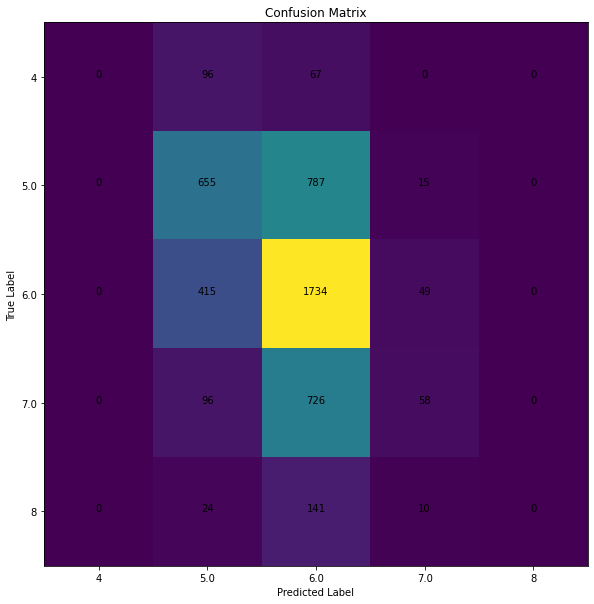

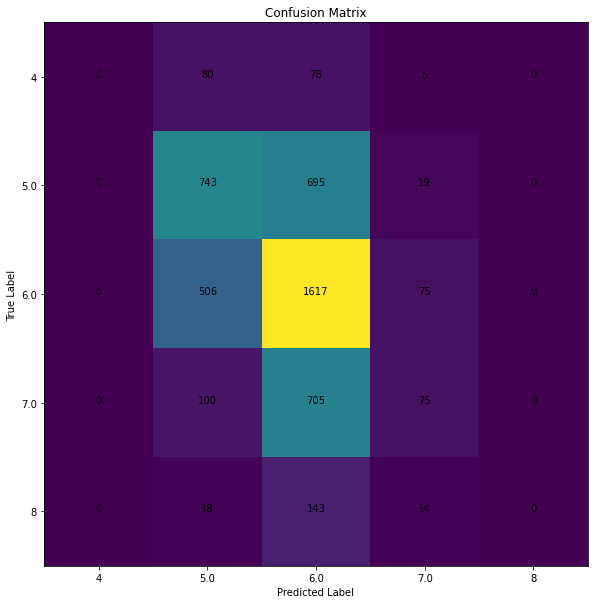

In [66]:
%%time
print("EM - PCA - wine")
params_em['n_components'] = 10 
Eval(EM(**params_em), X_w_pca, Y_w)
print("EM - ICA - wine")
params_em['n_components'] = 10 
Eval(EM(**params_em), X_w_ica, Y_w)
print("EM - SRP - wine")
params_em['n_components'] = 30 
Eval(EM(**params_em), X_w_srp, Y_w)
print("EM - GRP - wine")
params_em['n_components'] = 20 
Eval(EM(**params_em), X_w_grp, Y_w)

## PART 4: TRAINING NN ON projected data - abalone only

In [67]:
#UNUSED UNUSED UNUSED
def learning_curve_model_time(classifier, xtrain, ytrain, cv, titlePrepend):
    np.random.seed(1)
    N = len(ytrain)
    train_f1_mean = []
    validation_f1_mean = []
    train_time_mean = []
    pred_time_mean = []
    train_sizes=(np.arange(.1, 1.01, 0.1)*N).astype('int')  
    scoring = {'f1_score' : make_scorer(f1_score, average='micro')}

    for i in train_sizes:
        idx = np.random.randint(N, size=i)
        xsample = xtrain[idx,:]
        ysample = ytrain[idx]
        scores = cross_validate(classifier, xsample, ysample, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)
        
        train_f1_mean.append(np.mean(scores['train_f1_score']))
        validation_f1_mean.append(np.mean(scores['test_f1_score']))
        train_time_mean.append(np.mean(scores['fit_time']))
        pred_time_mean.append(np.mean(scores['score_time']))
    
    #Plot learning curve
    helperPlot(train_sizes, [train_f1_mean, validation_f1_mean], ["train", "validation"], "Training Samples",
                "F1 Score", titlePrepend + "\nLearning Curve")
    # plot timing curve
    helperPlot(train_sizes, [train_time_mean, pred_time_mean], ["Training Time", "Prediction Time"], "Training Samples",
               "Time (seconds)", titlePrepend + "\nModeling Time")
    
    return train_f1_mean, validation_f1_mean, train_time_mean, pred_time_mean

#UNUSED UNUSED UNUSED
def gridSearch(xtrain, ytrain, param_grid, classifier, cv=5):
    np.random.seed(1)
    model = sk.model_selection.GridSearchCV(estimator=classifier, param_grid=param_grid, cv=cv)
    model.fit(xtrain, ytrain)
    return (model.best_params_)

In [68]:
def show_CM2(conf_matrix, classes, name):
    
    plt.subplots(figsize=(10, 10))
    plt.imshow(conf_matrix)
    plt.title("Confusion Matrix - " + name)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(len(classes)), range(len(classes))):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="black")
        
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

def evaluate(model, xtrain, ytrain, xtest, ytest, name):
    np.random.seed(1)
    start = timeit.default_timer()
    model.fit(xtrain, ytrain)
    end = timeit.default_timer()
    training_time = end - start
    start = timeit.default_timer()    
    y_predicted = model.predict(xtest)
    end = timeit.default_timer()
    prediction_time = end - start
    
    result_f1_score = f1_score(ytest, y_predicted, average='macro')
    accuracy = accuracy_score(ytest,y_predicted)
    precision = precision_score(ytest,y_predicted, average='macro')
    recall = recall_score(ytest,y_predicted, average='macro')
    result_confusion_matrix = confusion_matrix(ytest,y_predicted)

    print(name)
    print("Train time: " + str(training_time))
    print("Prediction time: " + str(prediction_time))
    print("F1 Score: " + str(result_f1_score))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("\n")
    
    classes = set(list(set(ytrain)) + list(set(ytest)))
    
    show_CM2(result_confusion_matrix, list(classes), name)

def helperPlot(xData, yData, curveLabels, xlabel, ylabel, title): 
    fig = plt.figure()
    ax = plt.axes()
    plt.title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    N = len(curveLabels)
    for i in range(N):
        if type(xData[i]) != type([]):
            plt.plot(xData, yData[i], 'o-', label=curveLabels[i])
        else:
            plt.plot(xData[i], yData[i], 'o-', label=curveLabels[i])
        
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [69]:
def NN_routine2(data):
    train_f1_scores = []
    validation_f1_scores = []
    fit_times = []
    score_times = []
    train_samples = []
    names = []
    for name in data.keys():
        names.append(name)
        X_train, X_test = data[name][0], data[name][1]
        y_train, y_test = data[name][2], data[name][3]
        model_NN = MLPClassifier(hidden_layer_sizes=(100,100), solver='adam', 
                                 activation='relu', learning_rate_init=0.005, 
                                 random_state=100)
        evaluate(model_NN, X_train, y_train, X_test, y_test, name)
        
        model_NN = MLPClassifier(hidden_layer_sizes=(100,100), solver='adam', 
                                 activation='relu', learning_rate_init=0.005, 
                                 random_state=100)
        
        np.random.seed(1)
        N = len(y_train)
        train_f1_mean = []
        validation_f1_mean = []
        train_time_mean = []
        pred_time_mean = []
        training_examples = []
        train_sizes=(np.arange(.1, 1.01, 0.1)*N).astype('int')  
        scoring = {'f1_score' : make_scorer(f1_score, average='macro')}
        # go through each trianing size 
        for i in train_sizes:
            training_examples.append(i)
            idx = np.random.randint(N, size=i)
            # create train and validation set
            xsample = X_train[idx,:]
            ysample = y_train[idx]
            # use cross validation to get scores
            scores = cross_validate(model_NN, xsample, ysample, cv=5, scoring=scoring, n_jobs=-1, return_train_score=True)
            
            train_f1_mean.append(np.mean(scores['train_f1_score']))
            validation_f1_mean.append(np.mean(scores['test_f1_score']))
            train_time_mean.append(np.mean(scores['fit_time']))
            pred_time_mean.append(np.mean(scores['score_time']))
        
        validation_f1_scores.append(validation_f1_mean)
        train_f1_scores.append(train_f1_mean)
        fit_times.append(train_time_mean)
        score_times.append(pred_time_mean)
        train_samples = training_examples
        
    helperPlot(train_samples, 
               train_f1_scores,
               names, "Training samples", "Training F1 Score", 
               "Train Learning Curves - Projected Abalone")
    
    helperPlot(train_samples, 
               validation_f1_scores,
               names, "Training samples", "Validation F1 Score", 
               "Validation Learning Curves - Projected Abalone")
    
    helperPlot(train_samples, 
               fit_times,
               names, "Training samples", "Training Time (s)", 
               "Training Time - Projected Abalone")
    
    helperPlot(train_samples, 
               score_times,
               names, "Training samples", "Prediction Time (s)", 
               "Prediction Time - Projected Abalone")

In [70]:
X_a_pca_trainTest = train_test_split(X_a_pca, Y_a, stratify=Y_a, random_state=1)
X_a_ica_trainTest = train_test_split(X_a_ica, Y_a, stratify=Y_a, random_state=1)
X_a_srp_trainTest = train_test_split(X_a_srp, Y_a, stratify=Y_a, random_state=1)
X_a_grp_trainTest = train_test_split(X_a_grp, Y_a, stratify=Y_a, random_state=1)
X_a_trainTest = train_test_split(X_a, Y_a, stratify=Y_a, random_state=1)
data =  {
    'PCA': X_a_pca_trainTest,
    'ICA': X_a_ica_trainTest,
    'SRP': X_a_srp_trainTest,
    'GRP': X_a_grp_trainTest,
    'Unprojected': X_a_trainTest
}

PCA
Train time: 1.4602206000054139
Prediction time: 0.0019257000021752901
F1 Score: 0.13433298250964562
Accuracy: 0.2569778633301251
Precision: 0.12466463255634731
Recall: 0.15524289844687103




/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/pyt

ICA
Train time: 3.1525065999958315
Prediction time: 0.0015335999996750616
F1 Score: 0.1648588783756776
Accuracy: 0.2858517805582291
Precision: 0.1623815162407546
Recall: 0.17662615820707314




/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/pyt

SRP
Train time: 12.936489599997003
Prediction time: 0.0014786999963689595
F1 Score: 0.16175923712407428
Accuracy: 0.28200192492781523
Precision: 0.17839350008127897
Recall: 0.1694150770893608




/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/pyt

GRP
Train time: 1.6436290999990888
Prediction time: 0.002614900004118681
F1 Score: 0.1534246785219989
Accuracy: 0.27526467757459094
Precision: 0.1745325786845026
Recall: 0.15577847837419923




/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/pyt

Unprojected
Train time: 1.94910909999453
Prediction time: 0.0015296999990823679
F1 Score: 0.17149657132217783
Accuracy: 0.2848893166506256
Precision: 0.19372038684496026
Recall: 0.1830859670819971




/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/pyt

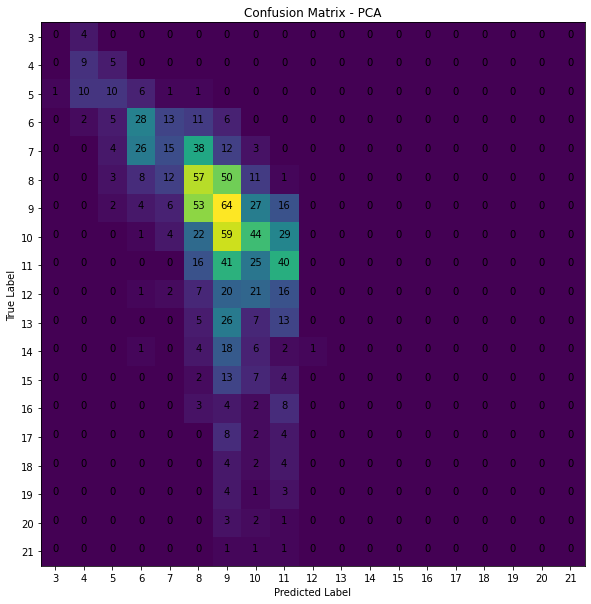

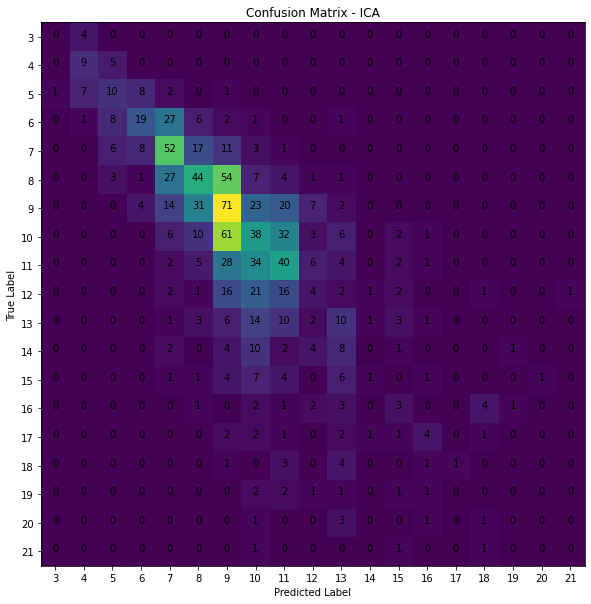

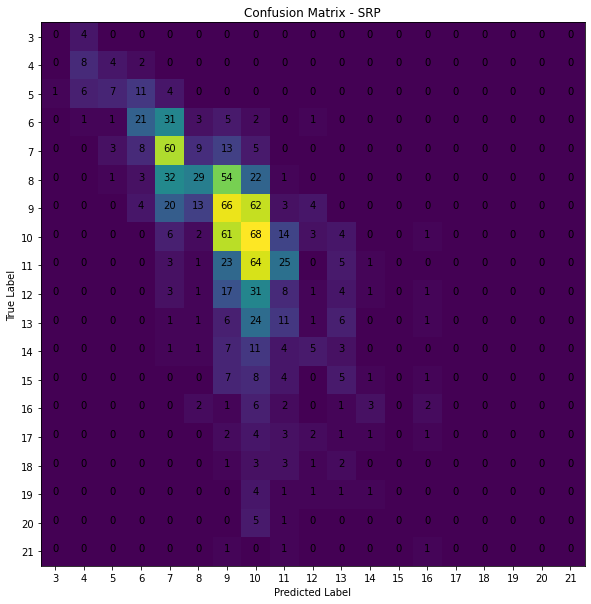

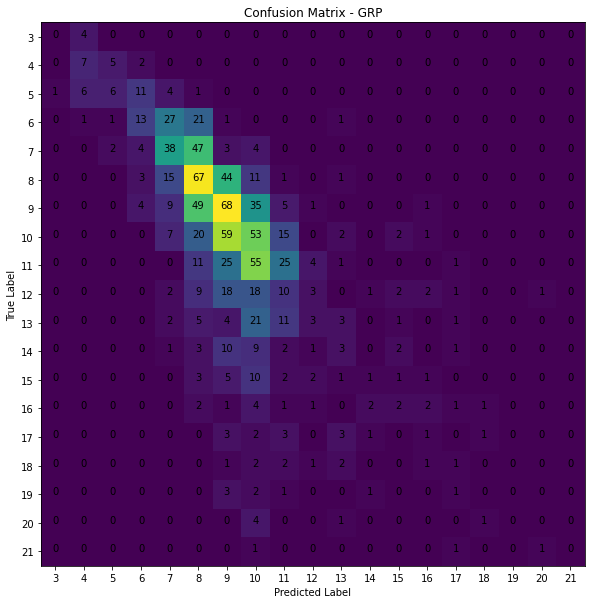

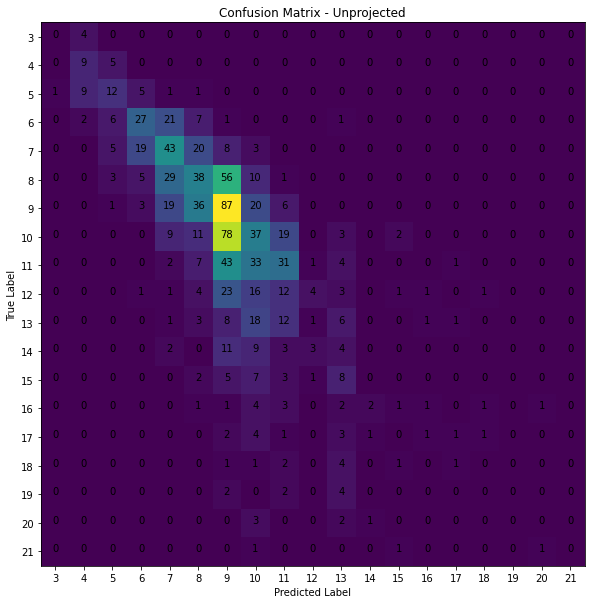

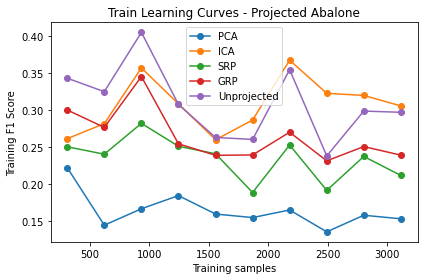

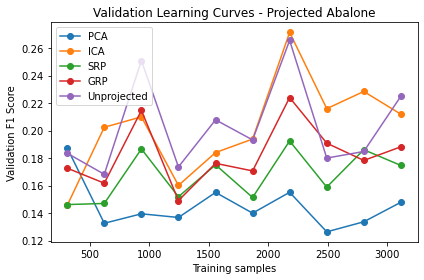

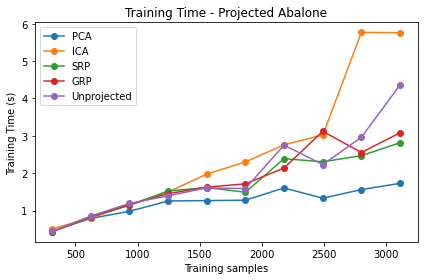

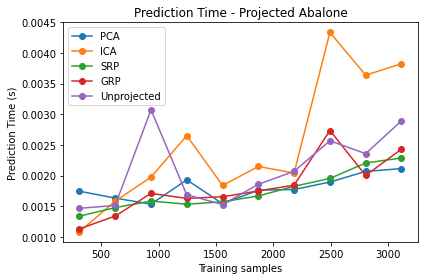

In [71]:
NN_routine2(data)

# PART 5: clustering algorithm results as addditional features for NN training

In [72]:
params_kmeans = {
    'n_init': 10,
    'random_state': 100,
    'n_clusters': 29
}
Kmeans_clusters_x_a = KMeans(**params_kmeans).fit(X_a).predict(X_a)

In [73]:
params_em = {
    'covariance_type': 'diag',
    'n_init': 1,
    'warm_start': True,
    'random_state': 100,
    'n_components': 7
}
EM_clusters_x_a = EM(**params_em).fit(X_a).predict(X_a)

In [74]:
def appClustLab(X, clusters):
    '''
    converts cluters from integer labels to one hot. appends to X.
    '''
    a = clusters
    b = np.zeros((a.size, a.max() + 1))
    b[np.arange(a.size), a] = 1
    
    return np.concatenate((X, b), axis=1)

In [75]:
X_a_pca_clust = appClustLab(appClustLab(X_a_pca, Kmeans_clusters_x_a), EM_clusters_x_a)
X_a_ica_clust = appClustLab(appClustLab(X_a_ica, Kmeans_clusters_x_a), EM_clusters_x_a)
X_a_srp_clust = appClustLab(appClustLab(X_a_srp, Kmeans_clusters_x_a), EM_clusters_x_a)
X_a_grp_clust = appClustLab(appClustLab(X_a_grp, Kmeans_clusters_x_a), EM_clusters_x_a)
X_a_clust = appClustLab(appClustLab(X_a, Kmeans_clusters_x_a), EM_clusters_x_a)

dataClust =  {
    'PCA': train_test_split(X_a_pca_clust, Y_a, stratify=Y_a, random_state=1),
    'ICA': train_test_split(X_a_ica_clust, Y_a, stratify=Y_a, random_state=1),
    'SRP': train_test_split(X_a_srp_clust, Y_a, stratify=Y_a, random_state=1),
    'GRP': train_test_split(X_a_grp_clust, Y_a, stratify=Y_a, random_state=1),
    'Unprojected': train_test_split(X_a_clust, Y_a, stratify=Y_a, random_state=1)
}

PCA
Train time: 19.922567100002198
Prediction time: 0.002689799999643583
F1 Score: 0.12342543111547999
Accuracy: 0.25120307988450435
Precision: 0.11393300610815092
Recall: 0.15069206940316723


ICA
Train time: 36.26787219999824
Prediction time: 0.018599600000015926
F1 Score: 0.1539956284237776
Accuracy: 0.2435033686236766
Precision: 0.15716323806636287
Recall: 0.1625927830235068




/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/pyt

SRP
Train time: 22.071018199996615
Prediction time: 0.0018801999976858497
F1 Score: 0.1748701140155374
Accuracy: 0.24639076034648702
Precision: 0.20187306979576464
Recall: 0.17446118131675195




/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/pyt

GRP
Train time: 14.5837348999994
Prediction time: 0.006271099999139551
F1 Score: 0.15503532116066907
Accuracy: 0.26756496631376325
Precision: 0.15807328674591525
Recall: 0.16688046681121887




/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/pyt

Unprojected
Train time: 6.383989000001748
Prediction time: 0.0018641999995452352
F1 Score: 0.17511960679641456
Accuracy: 0.27237728585178056
Precision: 0.18560737311876332
Recall: 0.18606169154031907




/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/drautuna/anaconda3/lib/pyt

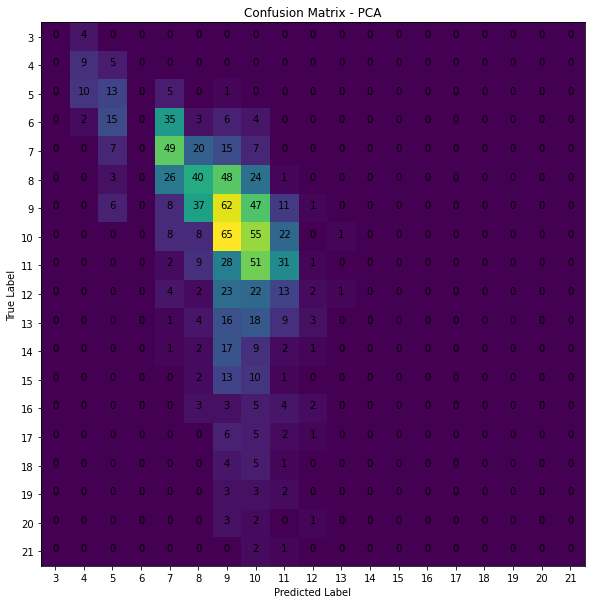

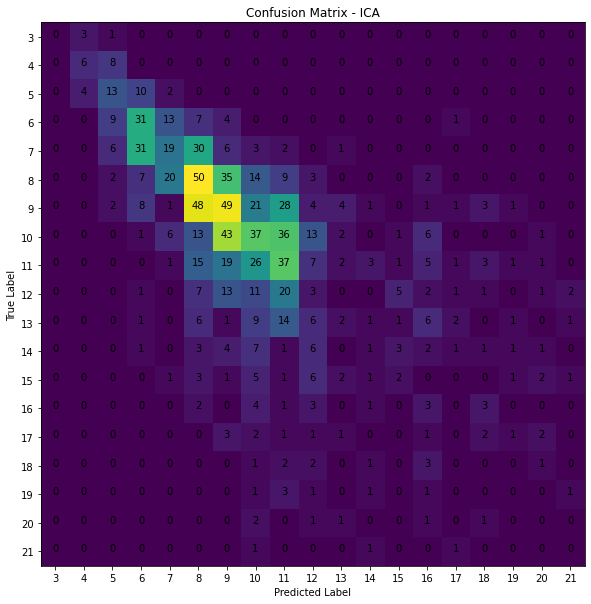

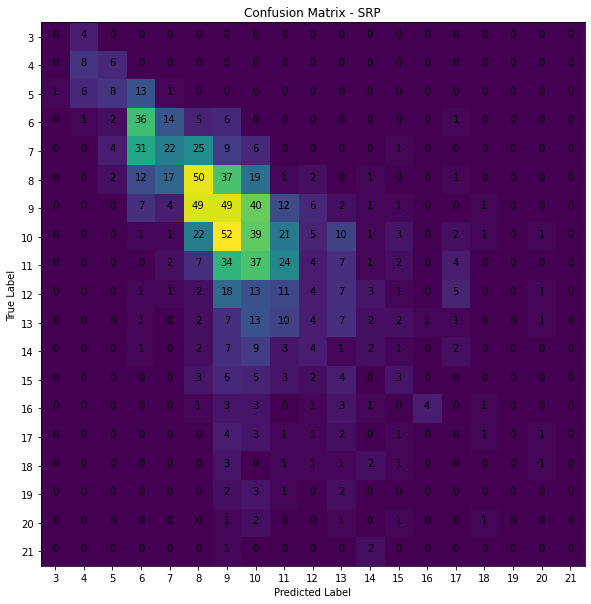

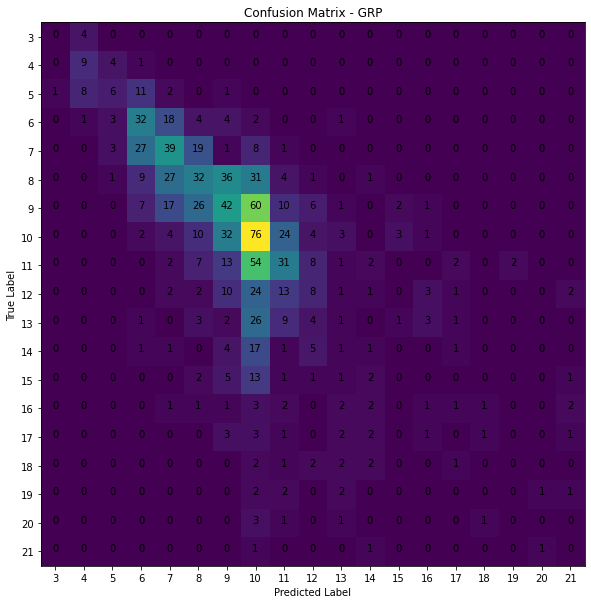

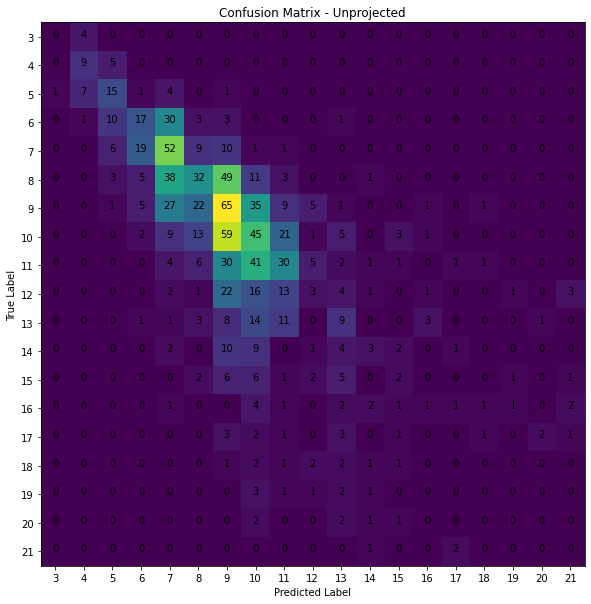

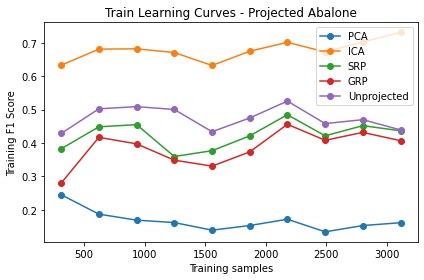

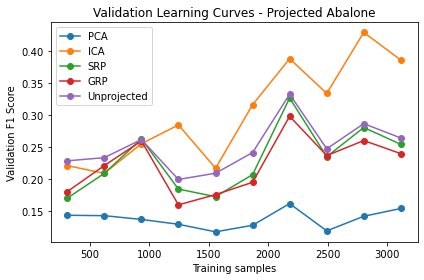

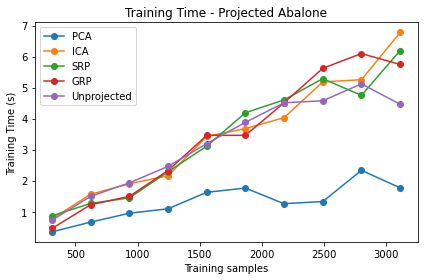

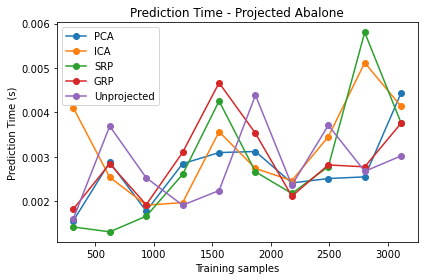

In [76]:
NN_routine2(dataClust)

## DONE?

In [554]:
#!pip freeze > requirements.txt